In [ ]:
install.packages("tidymodels")
install.packages("CatEncoders")
install.packages("discrim")
install.packages("imbalance")
install.packages("stats")
install.packages("psych")
install.packages("lsr")
install.packages("patchwork")
install.packages("expss")
install.packages('pROC')
install.packages("rempsyc")
install.packages("ROCR")
library(tidymodels)
library(CatEncoders)
library(discrim)
library(imbalance)
library(stats)
library(psych)
library(lsr)
library(patchwork)
library(expss)
library(pROC)
library(rempsyc)
library(ROCR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘Rcpp’, ‘diagram’, ‘lava’, ‘prodlim’, ‘warp’, ‘future.apply’, ‘iterators’, ‘listenv’, ‘parallelly’, ‘lhs’, ‘DiceDesign’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘doFuture’, ‘foreach’, ‘future’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘ggplot2’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘rstudioapi’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’, ‘libcoin’, ‘Formula’, ‘inum’, ‘dbscan’, ‘igraph’, ‘Cubist’, ‘partykit’, ‘bnlearn’, ‘KernelKnn’, ‘mvtnorm’, ‘smotefamily’, ‘FNN’, 

In [ ]:
data_disease <- read.csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
head(data_disease)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
6,56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


In [ ]:
describe(data_disease)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,5110,3.651783e+04,2.116172e+04,36932.000,36542.259051,27413.27400,67.00,72940.00,72873.00,-0.01990129,-1.2130551,2.960333e+02
gender*,2,5110,1.414286e+00,4.930436e-01,1.000,1.392613,0.00000,1.00,3.00,2.00,0.35280467,-1.8626789,6.897233e-03
age,3,5110,4.322661e+01,2.261265e+01,45.000,43.607877,26.68680,0.08,82.00,81.92,-0.13697887,-0.9920009,3.163304e-01
hypertension,4,5110,9.745597e-02,2.966067e-01,0.000,0.000000,0.00000,0.00,1.00,1.00,2.71379770,5.3657481,4.149258e-03
heart_disease,5,5110,5.401174e-02,2.260630e-01,0.000,0.000000,0.00000,0.00,1.00,1.00,3.94492690,13.5651030,3.162416e-03
ever_married*,6,5110,1.656164e+00,4.750335e-01,2.000,1.695205,0.00000,1.00,2.00,1.00,-0.65735918,-1.5681857,6.645288e-03
work_type*,7,5110,3.495499e+00,1.278532e+00,4.000,3.619374,0.00000,1.00,5.00,4.00,-0.90939410,-0.4867496,1.788550e-02
Residence_type*,8,5110,1.508023e+00,4.999845e-01,2.000,1.510029,0.00000,1.00,2.00,1.00,-0.03208864,-1.9993615,6.994330e-03
avg_glucose_level,9,5110,1.061477e+02,4.528356e+01,91.885,97.846204,26.06411,55.12,271.74,216.62,1.57136092,1.6758301,6.334759e-01


In [ ]:
str(data_disease)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : chr  "Male" "Female" "Male" "Female" ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr  "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : chr  "36.6" "N/A" "32.5" "34.4" ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
data_disease$hypertension <- as.character(data_disease$hypertension)
data_disease$heart_disease <- as.character(data_disease$heart_disease)
data_disease$stroke <- as.character(data_disease$stroke)

In [ ]:
str(data_disease)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : chr  "Male" "Female" "Male" "Female" ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : chr  "0" "0" "0" "0" ...
 $ heart_disease    : chr  "1" "0" "1" "0" ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr  "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : chr  "36.6" "N/A" "32.5" "34.4" ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : chr  "1" "1" "1" "1" ...


In [ ]:
data_disease$hypertension[data_disease$hypertension == '0'] <- 'No'
data_disease$hypertension[data_disease$hypertension == '1'] <- 'Yes'
data_disease$heart_disease[data_disease$heart_disease == '0'] <- 'No'
data_disease$heart_disease[data_disease$heart_disease == '1'] <- 'Yes'
data_disease$stroke[data_disease$stroke == '0'] <- 'No'
data_disease$stroke[data_disease$stroke == '1'] <- 'Yes'

In [ ]:
str(data_disease)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : chr  "Male" "Female" "Male" "Female" ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : chr  "No" "No" "No" "No" ...
 $ heart_disease    : chr  "Yes" "No" "Yes" "No" ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr  "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : chr  "36.6" "N/A" "32.5" "34.4" ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : chr  "Yes" "Yes" "Yes" "Yes" ...


In [ ]:
data_disease <- data_disease[, -1]

In [ ]:
head(data_disease)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,Male,67,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,Female,61,No,No,Yes,Self-employed,Rural,202.21,N/A,never smoked,Yes
3,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
4,Female,49,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
5,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24,never smoked,Yes
6,Male,81,No,No,Yes,Private,Urban,186.21,29,formerly smoked,Yes


In [ ]:
sum(duplicated(data_disease))

[1] 0

In [ ]:
colSums(is.na(data_disease))

gender               age      hypertension     heart_disease 
                0                 0                 0                 0 
     ever_married         work_type    Residence_type avg_glucose_level 
                0                 0                 0                 0 
              bmi    smoking_status            stroke 
                0                 0                 0

In [ ]:
colSums(data_disease == "N/A")

gender               age      hypertension     heart_disease 
                0                 0                 0                 0 
     ever_married         work_type    Residence_type avg_glucose_level 
                0                 0                 0                 0 
              bmi    smoking_status            stroke 
              201                 0                 0

In [ ]:
data_disease$bmi <- as.numeric(data_disease$bmi)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
str(data_disease)

'data.frame':	5110 obs. of  11 variables:
 $ gender           : chr  "Male" "Female" "Male" "Female" ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : chr  "No" "No" "No" "No" ...
 $ heart_disease    : chr  "Yes" "No" "Yes" "No" ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr  "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : num  36.6 NA 32.5 34.4 24 29 27.4 22.8 NA 24.2 ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : chr  "Yes" "Yes" "Yes" "Yes" ...


In [ ]:
data_disease$bmi[is.na(data_disease$bmi) == TRUE] <- mean(data_disease$bmi, na.rm = TRUE)

In [ ]:
colSums(is.na(data_disease))

gender               age      hypertension     heart_disease 
                0                 0                 0                 0 
     ever_married         work_type    Residence_type avg_glucose_level 
                0                 0                 0                 0 
              bmi    smoking_status            stroke 
                0                 0                 0

In [ ]:
data_disease %>% summarise_all(n_distinct)

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,104,2,2,2,5,2,3979,419,4,2


In [ ]:
apply(data_disease[c("gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke")], 2, function (x) unique(x))

$gender
[1] "Male"   "Female" "Other" 

$hypertension
[1] "No"  "Yes"

$heart_disease
[1] "Yes" "No" 

$ever_married
[1] "Yes" "No" 

$work_type
[1] "Private"       "Self-employed" "Govt_job"      "children"     
[5] "Never_worked" 

$Residence_type
[1] "Urban" "Rural"

$smoking_status
[1] "formerly smoked" "never smoked"    "smokes"          "Unknown"        

$stroke
[1] "Yes" "No"

In [ ]:
p1 <- ggplot(data = data_disease, aes(x = gender)) +
  geom_bar(color = "black", fill = "lightblue")

p2 <- ggplot(data = data_disease, aes(x = hypertension)) +
  geom_bar(color = "black", fill = "lightblue")

p3 <- ggplot(data = data_disease, aes(x = heart_disease)) +
  geom_bar(color = "black", fill = "lightblue")

p4 <- ggplot(data = data_disease, aes(x = ever_married)) +
  geom_bar(color = "black", fill = "lightblue")

p5 <- ggplot(data = data_disease, aes(x = work_type)) +
  geom_bar(color = "black", fill = "lightblue")

p6 <- ggplot(data = data_disease, aes(x = Residence_type)) +
  geom_bar(color = "black", fill = "lightblue")

p7 <- ggplot(data = data_disease, aes(x = smoking_status)) +
  geom_bar(color = "black", fill = "lightblue")

p8 <- ggplot(data = data_disease, aes(x = stroke)) +
  geom_bar(color = "black", fill = "lightblue")

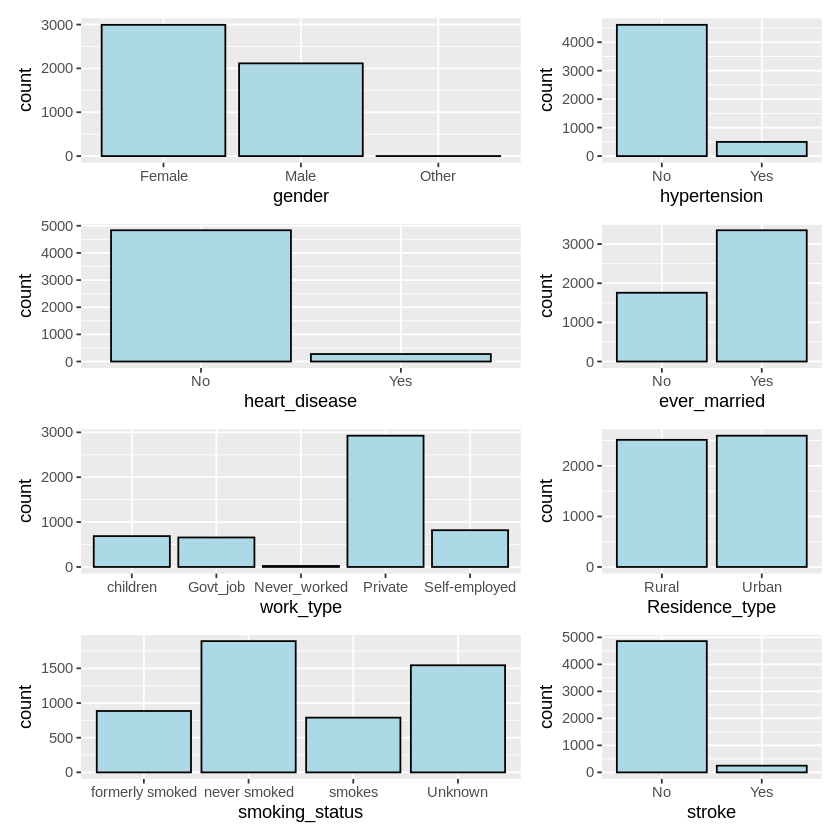

In [ ]:
p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + plot_layout(ncol = 2, widths = c(2, 1))

In [ ]:
data_disease <- data_disease[which(data_disease$gender != "Other"),]

In [ ]:
unique(data_disease$gender)

[1] "Male"   "Female"

In [ ]:
data_disease$work_type[data_disease$work_type == "children"] <- "Never_worked"

In [ ]:
count_formerly <- nrow(data_disease[data_disease$smoking_status == 'formerly smoked', ])
count_never <- nrow(data_disease[data_disease$smoking_status == 'never smoked', ])
count_smokes <- nrow(data_disease[data_disease$smoking_status == 'smokes', ])

In [ ]:
all <- count_formerly + count_never + count_smokes

In [ ]:
prop_formerly <- count_formerly / all
prop_never <- count_never / all
prop_smokes <- count_smokes / all

In [ ]:
count_unknown <- nrow(data_disease[data_disease$smoking_status == 'Unknown', ])
count_unknown

[1] 1544

In [ ]:
data_disease$smoking_status[data_disease$smoking_status == "Unknown"] <- NA

In [ ]:
set.seed(123)
data_disease[is.na(data_disease$smoking_status)] <- sample(c('formerly smoked', 'never smoked', 'smokes'), count_unknown, replace = TRUE, prob = c(prop_formerly, prop_never, prop_smokes))

ERROR: Error in `[<-.data.frame`(`*tmp*`, is.na(data_disease$smoking_status), : duplicate subscripts for columns


In [ ]:
p1 <- ggplot(data = data_disease, aes(x = gender)) +
  geom_bar(color = "black", fill = "lightblue")

p2 <- ggplot(data = data_disease, aes(x = hypertension)) +
  geom_bar(color = "black", fill = "lightblue")

p3 <- ggplot(data = data_disease, aes(x = heart_disease)) +
  geom_bar(color = "black", fill = "lightblue")

p4 <- ggplot(data = data_disease, aes(x = ever_married)) +
  geom_bar(color = "black", fill = "lightblue")

p5 <- ggplot(data = data_disease, aes(x = work_type)) +
  geom_bar(color = "black", fill = "lightblue")

p6 <- ggplot(data = data_disease, aes(x = Residence_type)) +
  geom_bar(color = "black", fill = "lightblue")

p7 <- ggplot(data = data_disease, aes(x = smoking_status)) +
  geom_bar(color = "black", fill = "lightblue")

p8 <- ggplot(data = data_disease, aes(x = stroke)) +
  geom_bar(color = "black", fill = "lightblue")

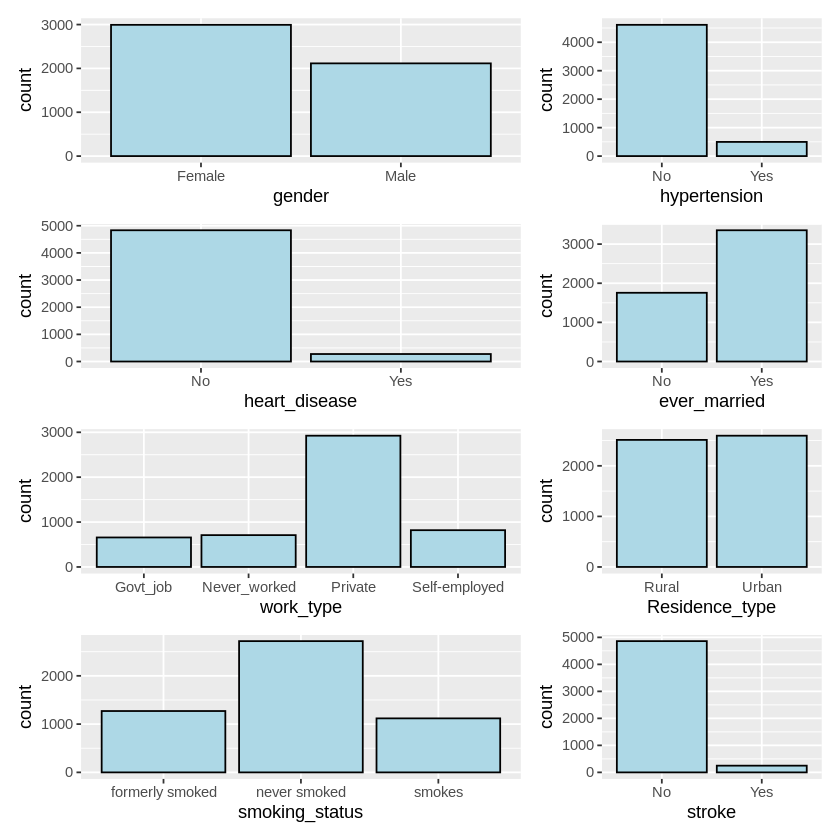

In [ ]:
p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + plot_layout(ncol = 2, widths = c(2, 1))

In [ ]:
p9 <- ggplot(data_disease, aes(x=age,  y = after_stat(density))) +
  geom_histogram(color="black", fill="lightblue", binwidth = 3)

p10 <- ggplot(data_disease, aes(x=avg_glucose_level,  y = after_stat(density))) +
  geom_histogram(color="black", fill="lightblue", binwidth = 3)

p11 <- ggplot(data_disease, aes(x=bmi,  y = after_stat(density))) +
  geom_histogram(color="black", fill="lightblue", binwidth = 1)

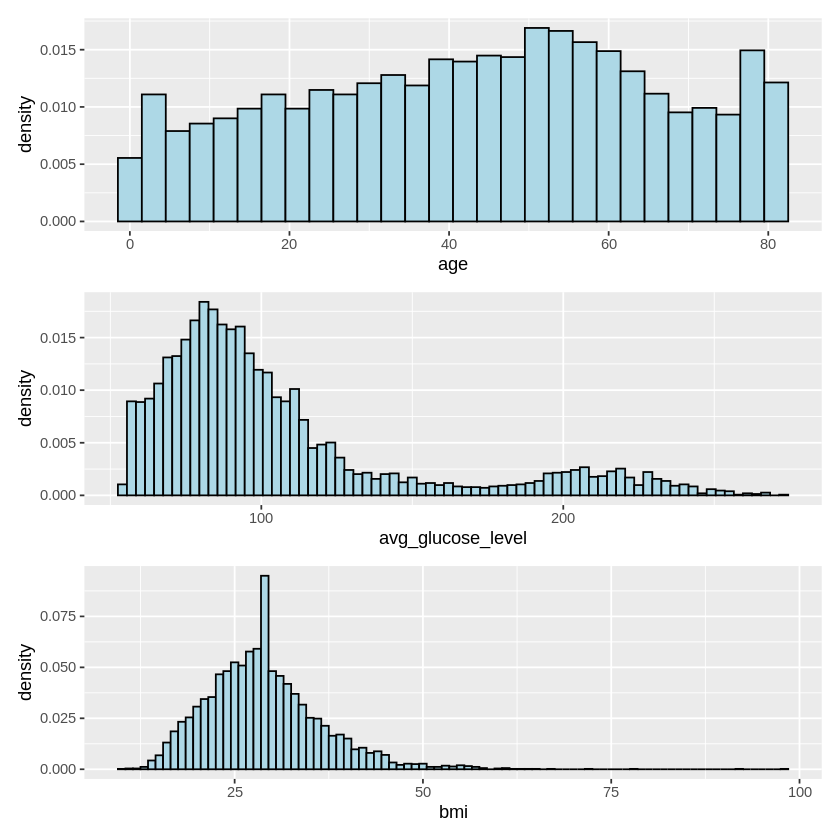

In [ ]:
p9 + p10 + p11 + plot_layout(ncol = 1)

In [ ]:
install.packages("ggmosaic")
library(ggmosaic)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘productplots’, ‘plotly’, ‘ggrepel’




In [ ]:
p1 <- data_disease %>%
  ggplot() +
  geom_mosaic(aes(x = product(gender), fill=stroke), show.legend = FALSE) +
  theme_mosaic() +
  scale_fill_manual(values = c("#4575B4", "#ABD9E9", "#FEE090", "#F46D43"))

In [ ]:
p2 <- data_disease %>%
  ggplot() +
  geom_mosaic(aes(x = product(heart_disease), fill=stroke), show.legend = FALSE) +
  theme_mosaic() +
  scale_fill_manual(values = c("#4575B4", "#ABD9E9", "#FEE090", "#F46D43"))

In [ ]:
p3 <- data_disease %>%
  ggplot() +
  geom_mosaic(aes(x = product(work_type), fill=stroke), show.legend = FALSE) +
  theme_mosaic() +
  scale_fill_manual(values = c("#4575B4", "#ABD9E9", "#FEE090", "#F46D43"))

In [ ]:
p4 <- data_disease %>%
  ggplot() +
  geom_mosaic(aes(x = product(smoking_status), fill=stroke), show.legend = FALSE) +
  theme_mosaic() +
  scale_fill_manual(values = c("#4575B4", "#ABD9E9", "#FEE090", "#F46D43"))

In [ ]:
p5 <- data_disease %>%
  ggplot() +
  geom_mosaic(aes(x = product(hypertension), fill=stroke), show.legend = FALSE) +
  theme_mosaic() +
  scale_fill_manual(values = c("#4575B4", "#ABD9E9", "#FEE090", "#F46D43"))

In [ ]:
p6 <- data_disease %>%
  ggplot() +
  geom_mosaic(aes(x = product(ever_married), fill=stroke), show.legend = FALSE) +
  theme_mosaic() +
  scale_fill_manual(values = c("#4575B4", "#ABD9E9", "#FEE090", "#F46D43"))

In [ ]:
p7 <- data_disease %>%
  ggplot() +
  geom_mosaic(aes(x = product(Residence_type), fill=stroke), show.legend = FALSE) +
  theme_mosaic() +
  scale_fill_manual(values = c("#4575B4", "#ABD9E9", "#FEE090", "#F46D43"))

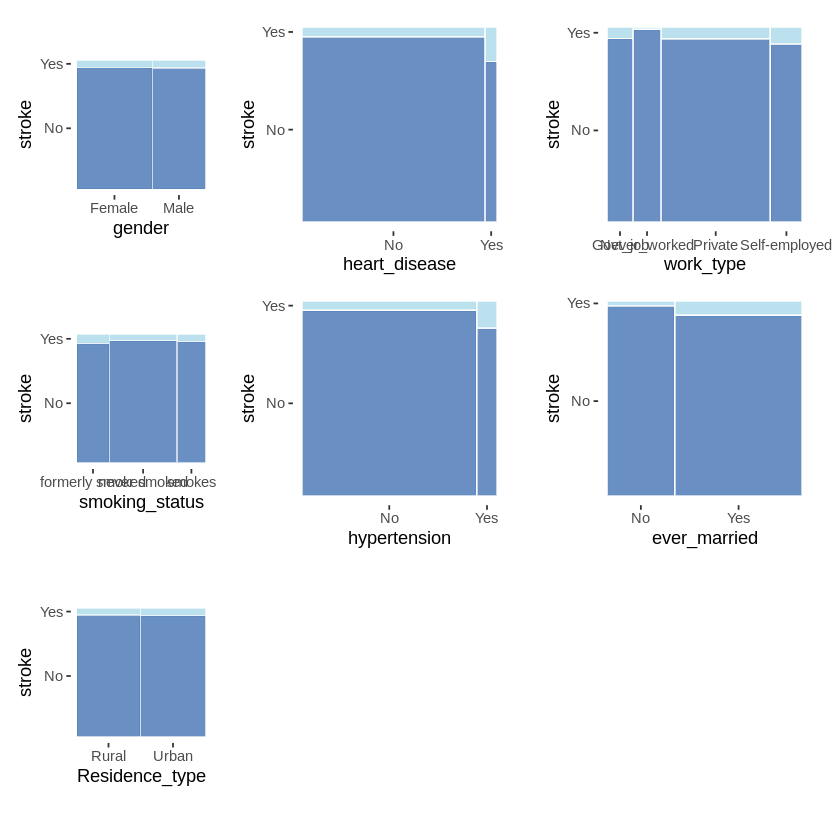

In [ ]:
p1 + p2 + p3 + p4 + p5 + p6 + p7 + plot_layout(ncol = 3, widths = c(3, 5, 5))

In [ ]:
inner_join(inner_join(inner_join(inner_join(cross_cases(data_disease, stroke, gender),
      cross_cases(data_disease, stroke, ever_married)), cross_cases(data_disease, stroke, Residence_type)), cross_cases(data_disease, stroke, hypertension)), cross_cases(data_disease, stroke, heart_disease))

Joining with `by = join_by(row_labels)`
Joining with `by = join_by(row_labels)`
Joining with `by = join_by(row_labels)`
Joining with `by = join_by(row_labels)`


|        |              | gender |      | ever_married |      | Residence_type |       | hypertension |     | heart_disease |     |
 |        |              | Female | Male |           No |  Yes |          Rural | Urban |           No | Yes |            No | Yes |
 | ------ | ------------ | ------ | ---- | ------------ | ---- | -------------- | ----- | ------------ | --- | ------------- | --- |
 | stroke |           No |   2853 | 2007 |         1727 | 3133 |           2399 |  2461 |         4428 | 432 |          4631 | 229 |
 |        |          Yes |    141 |  108 |           29 |  220 |            114 |   135 |          183 |  66 |           202 |  47 |
 |        | #Total cases |   2994 | 2115 |         1756 | 3353 |           2513 |  2596 |         4611 | 498 |          4833 | 276 |

In [ ]:
inner_join(cross_cases(data_disease, stroke, smoking_status), cross_cases(data_disease, stroke, work_type))

Joining with `by = join_by(row_labels)`


|        |              |  smoking_status |              |        | work_type |              |         |               |
 |        |              | formerly smoked | never smoked | smokes |  Govt_job | Never_worked | Private | Self-employed |
 | ------ | ------------ | --------------- | ------------ | ------ | --------- | ------------ | ------- | ------------- |
 | stroke |           No |            1190 |         2605 |   1065 |       624 |          707 |    2775 |           754 |
 |        |          Yes |              81 |          114 |     54 |        33 |            2 |     149 |            65 |
 |        | #Total cases |            1271 |         2719 |   1119 |       657 |          709 |    2924 |           819 |

In [ ]:
CHIS <- lapply(data_disease[,], function(x) chisq.test(data_disease["stroke"], x))
CHIS

Warning message in chisq.test(data_disease["stroke"], x):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(data_disease["stroke"], x):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(data_disease["stroke"], x):
“Chi-squared approximation may be incorrect”


$gender

	Pearson's Chi-squared test with Yates' continuity correction

data:  data_disease["stroke"] and x
X-squared = 0.34, df = 1, p-value = 0.5598


$age

	Pearson's Chi-squared test

data:  data_disease["stroke"] and x
X-squared = 491.61, df = 103, p-value < 2.2e-16


$hypertension

	Pearson's Chi-squared test with Yates' continuity correction

data:  data_disease["stroke"] and x
X-squared = 81.573, df = 1, p-value < 2.2e-16


$heart_disease

	Pearson's Chi-squared test with Yates' continuity correction

data:  data_disease["stroke"] and x
X-squared = 90.229, df = 1, p-value < 2.2e-16


$ever_married

	Pearson's Chi-squared test with Yates' continuity correction

data:  data_disease["stroke"] and x
X-squared = 58.868, df = 1, p-value = 1.686e-14


$work_type

	Pearson's Chi-squared test

data:  data_disease["stroke"] and x
X-squared = 49.155, df = 3, p-value = 1.209e-10


$Residence_type

	Pearson's Chi-squared test with Yates' continuity correction

data:  data_disease["stroke"] 

In [ ]:
do.call(rbind, lapply(CHIS, tidy))

,statistic,p.value,parameter,method
,<dbl>,<dbl>,<int>,<chr>
1,0.3400025,5.598278e-01,1,Pearson's Chi-squared test with Yates' continuity correction
2,491.6051942,5.462866e-52,103,Pearson's Chi-squared test
3,81.5731446,1.688936e-19,1,Pearson's Chi-squared test with Yates' continuity correction
4,90.2294366,2.120831e-21,1,Pearson's Chi-squared test with Yates' continuity correction
5,58.8678092,1.686286e-14,1,Pearson's Chi-squared test with Yates' continuity correction
6,49.1552517,1.208865e-10,3,Pearson's Chi-squared test
7,1.0749713,2.998252e-01,1,Pearson's Chi-squared test with Yates' continuity correction
8,4170.7351517,1.595961e-02,3977,Pearson's Chi-squared test
9,458.8431790,8.197385e-02,418,Pearson's Chi-squared test


In [ ]:
rbindlist(lapply(CHIS, tidy), idcol=TRUE)

.id,statistic,p.value,parameter,method
<chr>,<dbl>,<dbl>,<int>,<chr>
gender,0.3400025,5.598278e-01,1,Pearson's Chi-squared test with Yates' continuity correction
age,491.6051942,5.462866e-52,103,Pearson's Chi-squared test
hypertension,81.5731446,1.688936e-19,1,Pearson's Chi-squared test with Yates' continuity correction
heart_disease,90.2294366,2.120831e-21,1,Pearson's Chi-squared test with Yates' continuity correction
ever_married,58.8678092,1.686286e-14,1,Pearson's Chi-squared test with Yates' continuity correction
work_type,49.1552517,1.208865e-10,3,Pearson's Chi-squared test
Residence_type,1.0749713,2.998252e-01,1,Pearson's Chi-squared test with Yates' continuity correction
avg_glucose_level,4170.7351517,1.595961e-02,3977,Pearson's Chi-squared test
bmi,458.8431790,8.197385e-02,418,Pearson's Chi-squared test


In [ ]:
install.packages("rempsyc")
library(rempsyc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Suggested APA citation: Thériault, R. (2023). rempsyc: Convenience functions for psychology. 
Journal of Open Source Software, 8(87), 5466. https://doi.org/10.21105/joss.05466



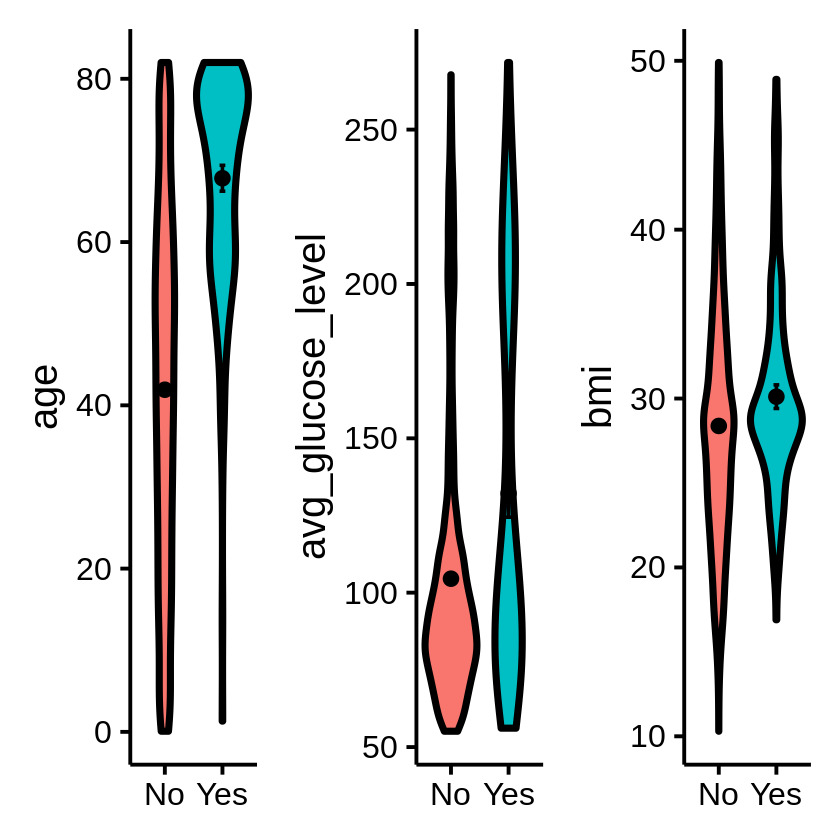

In [ ]:
p12 <- nice_violin(data = data_disease, group = "stroke", response = "age")
p13 <- nice_violin(data = data_disease, group = "stroke", response = "avg_glucose_level")
p14 <- nice_violin(data = data_disease, group = "stroke", response = "bmi")
p12 + p13 + p14 + plot_layout(ncol = 3, widths = c(1, 1, 1))

In [ ]:
model <- aov(bmi ~ gender + hypertension + heart_disease + ever_married + work_type + Residence_type + smoking_status + stroke, data = data_disease)

In [ ]:
summary(model)

In [ ]:
cor.test(data_disease$bmi, data_disease$avg_glucose_level)


	Pearson's product-moment correlation

data:  data_disease$bmi and data_disease$avg_glucose_level
t = 12.488, df = 4907, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1482550 0.2024831
sample estimates:
      cor 
0.1755022 


In [ ]:
cor.test(data_disease$bmi, data_disease$age)


	Pearson's product-moment correlation

data:  data_disease$bmi and data_disease$age
t = 24.772, df = 4907, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3082984 0.3580337
sample estimates:
     cor 
0.333398 


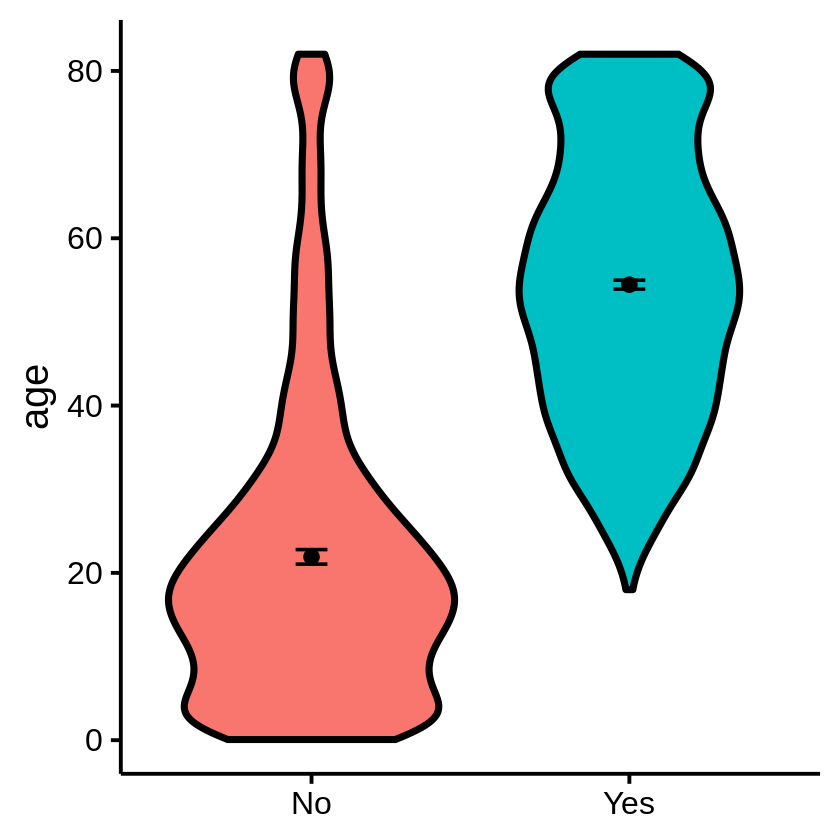

In [ ]:
nice_violin(data = data_disease, group = "ever_married", response = "age")

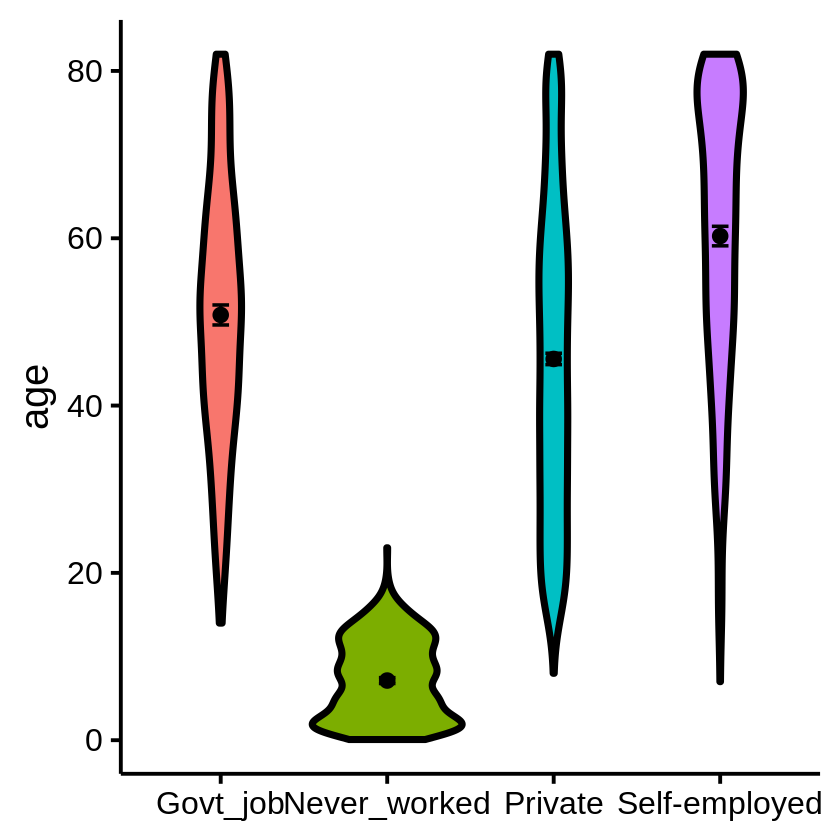

In [ ]:
nice_violin(data = data_disease, group = "work_type", response = "age")

Modeling

In [ ]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘ModelMetrics’


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
data_disease$hypertension[data_disease$hypertension == 'No'] <- 0
data_disease$hypertension[data_disease$hypertension == 'Yes'] <- 1
data_disease$heart_disease[data_disease$heart_disease == 'No'] <- 0
data_disease$heart_disease[data_disease$heart_disease == 'Yes'] <- 1
data_disease$ever_married[data_disease$ever_married == 'No'] <- 0
data_disease$ever_married[data_disease$ever_married == 'Yes'] <- 1
data_disease$stroke[data_disease$stroke == 'No'] <- 0
data_disease$stroke[data_disease$stroke == 'Yes'] <- 1

In [ ]:
head(data_disease)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Male,67,0,1,1,Private,Urban,228.69,36.60000,formerly smoked,1
2,Female,61,0,0,1,Self-employed,Rural,202.21,28.89324,never smoked,1
3,Male,80,0,1,1,Private,Rural,105.92,32.50000,never smoked,1
4,Female,49,0,0,1,Private,Urban,171.23,34.40000,smokes,1
5,Female,79,1,0,1,Self-employed,Rural,174.12,24.00000,never smoked,1
6,Male,81,0,0,1,Private,Urban,186.21,29.00000,formerly smoked,1


In [ ]:
unique(data_disease$smoking_status)

[1] "formerly smoked" "never smoked"    "smokes"

In [ ]:
data_disease <- data_disease %>% mutate(gender_male = ifelse(gender == "Male", 1, 0), gender_female = ifelse(gender == "Female", 1, 0), work_type_private = ifelse(work_type == "Private", 1, 0), work_type_self = ifelse(work_type == "Self-employed", 1, 0), work_type_govt = ifelse(work_type == "Govt_job", 1, 0), work_type_never = ifelse(work_type == "Never_worked", 1, 0), residence_type_urban = ifelse(Residence_type == "Urban", 1, 0), residence_type_rural = ifelse(Residence_type == "Rural", 1, 0), smoking_formerly = ifelse(smoking_status == "formerly smoked", 1, 0), smoking_never = ifelse(smoking_status == "never smoked", 1, 0), smoking_smokes = ifelse(smoking_status == "smokes", 1, 0))

In [ ]:
data_disease <- data_disease[,!names(data_disease) %in% c("gender", "work_type", "Residence_type", "smoking_status", "gender_male", "work_type_never", "residence_type_urban", "smoking_never")]

In [ ]:
head(data_disease)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_female,work_type_private,work_type_self,work_type_govt,residence_type_rural,smoking_formerly,smoking_smokes
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,67,0,1,1,228.69,36.60000,1,0,1,0,0,0,1,0
2,61,0,0,1,202.21,28.89324,1,1,0,1,0,1,0,0
3,80,0,1,1,105.92,32.50000,1,0,1,0,0,1,0,0
4,49,0,0,1,171.23,34.40000,1,1,1,0,0,0,0,1
5,79,1,0,1,174.12,24.00000,1,1,0,1,0,1,0,0
6,81,0,0,1,186.21,29.00000,1,0,1,0,0,0,1,0


In [ ]:
str(data_disease)

'data.frame':	5109 obs. of  14 variables:
 $ age                 : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension        : chr  "0" "0" "0" "0" ...
 $ heart_disease       : chr  "1" "0" "1" "0" ...
 $ ever_married        : chr  "1" "1" "1" "1" ...
 $ avg_glucose_level   : num  229 202 106 171 174 ...
 $ bmi                 : num  36.6 28.9 32.5 34.4 24 ...
 $ stroke              : chr  "1" "1" "1" "1" ...
 $ gender_female       : num  0 1 0 1 1 0 0 1 1 1 ...
 $ work_type_private   : num  1 0 1 1 0 1 1 1 1 1 ...
 $ work_type_self      : num  0 1 0 0 1 0 0 0 0 0 ...
 $ work_type_govt      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ residence_type_rural: num  0 1 1 0 1 0 1 0 1 0 ...
 $ smoking_formerly    : num  1 0 0 0 0 1 0 0 0 0 ...
 $ smoking_smokes      : num  0 0 0 1 0 0 0 0 0 1 ...


In [ ]:
cols = c("hypertension", "heart_disease", "ever_married", "gender_female", "work_type_private", "work_type_self", "work_type_govt", "residence_type_rural", "smoking_formerly", "smoking_smokes")

In [ ]:
data_disease[cols] <- lapply(data_disease[cols], as.integer)

In [ ]:
str(data_disease)

'data.frame':	5109 obs. of  14 variables:
 $ age                 : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension        : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease       : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married        : int  1 1 1 1 1 1 1 0 1 1 ...
 $ avg_glucose_level   : num  229 202 106 171 174 ...
 $ bmi                 : num  36.6 28.9 32.5 34.4 24 ...
 $ stroke              : chr  "1" "1" "1" "1" ...
 $ gender_female       : int  0 1 0 1 1 0 0 1 1 1 ...
 $ work_type_private   : int  1 0 1 1 0 1 1 1 1 1 ...
 $ work_type_self      : int  0 1 0 0 1 0 0 0 0 0 ...
 $ work_type_govt      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ residence_type_rural: int  0 1 1 0 1 0 1 0 1 0 ...
 $ smoking_formerly    : int  1 0 0 0 0 1 0 0 0 0 ...
 $ smoking_smokes      : int  0 0 0 1 0 0 0 0 0 1 ...


In [ ]:
set.seed(123)
new_data_disease <- data_disease %>%
mutate(
    stroke = as.character(stroke),
    across(where(is.factor), as.numeric),
    stroke = factor(stroke)
)

stroke_oversampled <- oversample(as.data.frame(new_data_disease), classAttr = "stroke", ratio = 1, method = "MWMOTE")

In [ ]:
set.seed(123)
stroke_oversampled %>%
group_by(stroke) %>%
summarize(n = n()) %>%
mutate(prop = round(n / sum(n), 2))

stroke,n,prop
<fct>,<int>,<dbl>
0,4860,0.5
1,4860,0.5


In [ ]:
install.packages("missForest")
library(missForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rngtools’, ‘randomForest’, ‘itertools’, ‘doRNG’




In [ ]:
install.packages("Boruta")
install.packages("mlbench")
install.packages("randomForest")
library(Boruta)
library(mlbench)
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘ranger’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:psych’:

    outlier


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
data_disease$stroke <- as.factor(data_disease$stroke)

In [ ]:
str(data_disease)

'data.frame':	5109 obs. of  14 variables:
 $ age                 : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension        : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease       : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married        : int  1 1 1 1 1 1 1 0 1 1 ...
 $ avg_glucose_level   : num  229 202 106 171 174 ...
 $ bmi                 : num  36.6 28.9 32.5 34.4 24 ...
 $ stroke              : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ gender_female       : int  0 1 0 1 1 0 0 1 1 1 ...
 $ work_type_private   : int  1 0 1 1 0 1 1 1 1 1 ...
 $ work_type_self      : int  0 1 0 0 1 0 0 0 0 0 ...
 $ work_type_govt      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ residence_type_rural: int  0 1 1 0 1 0 1 0 1 0 ...
 $ smoking_formerly    : int  1 0 0 0 0 1 0 0 0 0 ...
 $ smoking_smokes      : int  0 0 0 1 0 0 0 0 0 1 ...


In [ ]:
set.seed(111)
boruta <- Boruta(stroke ~ ., data = data_disease, doTrace = 2, maxRuns = 500)
boruta

 1. run of importance source...

 2. run of importance source...

 3. run of importance source...

 4. run of importance source...

 5. run of importance source...

 6. run of importance source...

 7. run of importance source...

 8. run of importance source...

 9. run of importance source...

 10. run of importance source...

 11. run of importance source...

After 11 iterations, +55 secs: 

 confirmed 6 attributes: age, bmi, ever_married, heart_disease, hypertension and 1 more;

 rejected 6 attributes: avg_glucose_level, gender_female, residence_type_rural, smoking_formerly, smoking_smokes and 1 more;

 still have 1 attribute left.


 12. run of importance source...

 13. run of importance source...

 14. run of importance source...

 15. run of importance source...

 16. run of importance source...

 17. run of importance source...

 18. run of importance source...

After 18 iterations, +1.2 mins: 

 rejected 1 attribute: work_type_private;

 no more attributes left.




Boruta performed 18 iterations in 1.218112 mins.
 6 attributes confirmed important: age, bmi, ever_married,
heart_disease, hypertension and 1 more;
 7 attributes confirmed unimportant: avg_glucose_level, gender_female,
residence_type_rural, smoking_formerly, smoking_smokes and 2 more;

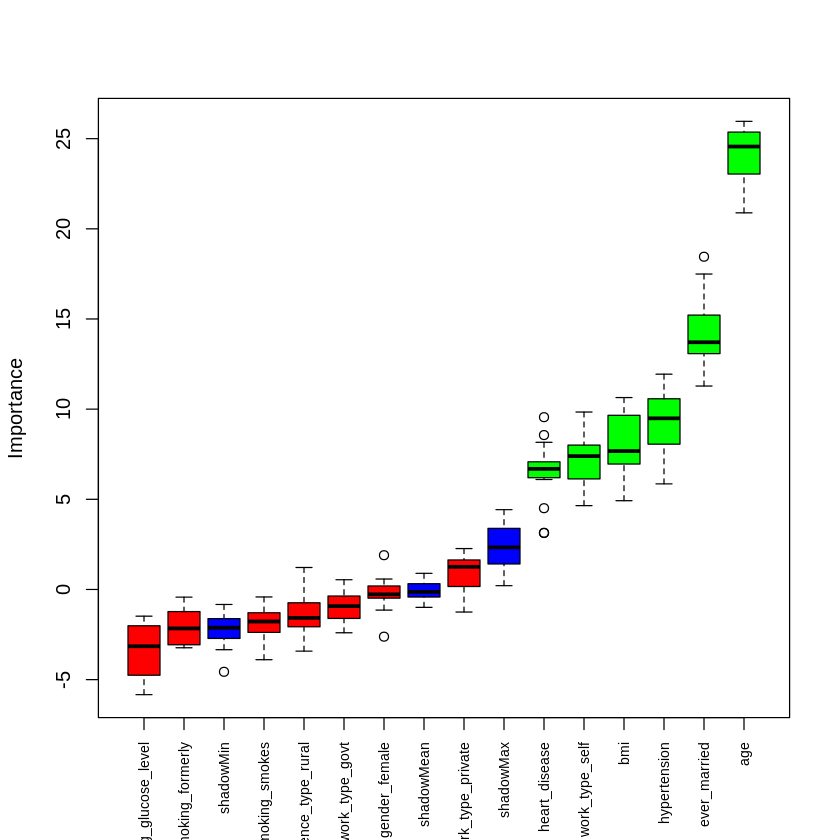

In [ ]:
plot(boruta, xlab = "", xaxt = "n")
 lz<-lapply(1:ncol(boruta$ImpHistory),function(i) boruta$ImpHistory[is.finite(boruta$ImpHistory[,i]),i])
names(lz) <- colnames(boruta$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),at = 1:ncol(boruta$ImpHistory), cex.axis = 0.7)

In [ ]:
stroke ~ age + ever_married + hypertension + bmi + work_type_self + heart_disease

In [ ]:
process <- preProcess(as.data.frame(data), method=c("range"))

norm_scale <- predict(process, as.data.frame(data))

In [ ]:
#(x-min(x))/(max(x)-min(x))
stroke_oversampled$bmi <- (stroke_oversampled$bmi-min(stroke_oversampled$bmi))/(max(stroke_oversampled$bmi)-min(stroke_oversampled$bmi))
stroke_oversampled$avg_glucose_level <- (stroke_oversampled$avg_glucose_level-min(stroke_oversampled$avg_glucose_level))/(max(stroke_oversampled$avg_glucose_level)-min(stroke_oversampled$avg_glucose_level))
stroke_oversampled$age <- (stroke_oversampled$age-min(stroke_oversampled$age))/(max(stroke_oversampled$age)-min(stroke_oversampled$age))

In [ ]:
stroke_oversampled$bmi <- scale(stroke_oversampled$bmi)
stroke_oversampled$avg_glucose_level <- scale(stroke_oversampled$avg_glucose_level)
stroke_oversampled$age <- scale(stroke_oversampled$age)

In [ ]:
head(stroke_oversampled)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_female,work_type_private,work_type_self,work_type_govt,residence_type_rural,smoking_formerly,smoking_smokes,id
,"<dbl[,1]>",<int>,<int>,<int>,"<dbl[,1]>","<dbl[,1]>",<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0.4791415,0,1,1,2.0844762,1.20368248,1,0,1,0,0,0,1,0,1
2,0.2096572,0,0,1,1.5814949,-0.02851523,1,1,0,1,0,1,0,0,2
3,1.0630239,0,1,1,-0.2475105,0.54815297,1,0,1,0,0,1,0,0,3
4,-0.3293112,0,0,1,0.9930373,0.85193494,1,1,1,0,0,0,0,1,4
5,1.0181099,1,0,1,1.0479321,-0.81087162,1,1,0,1,0,1,0,0,5
6,1.1079380,0,0,1,1.2775788,-0.01144539,1,0,1,0,0,0,1,0,6


In [ ]:
unique(data_disease$hypertension)

[1] 0 1

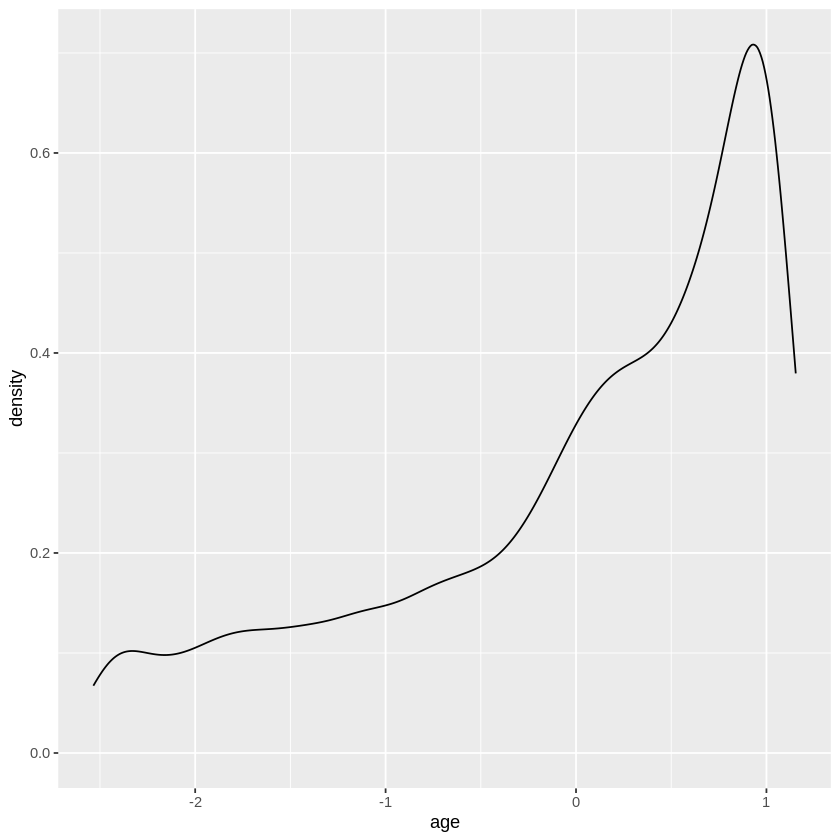

In [ ]:
ggplot(stroke_oversampled, aes(x=age)) +
  geom_density()

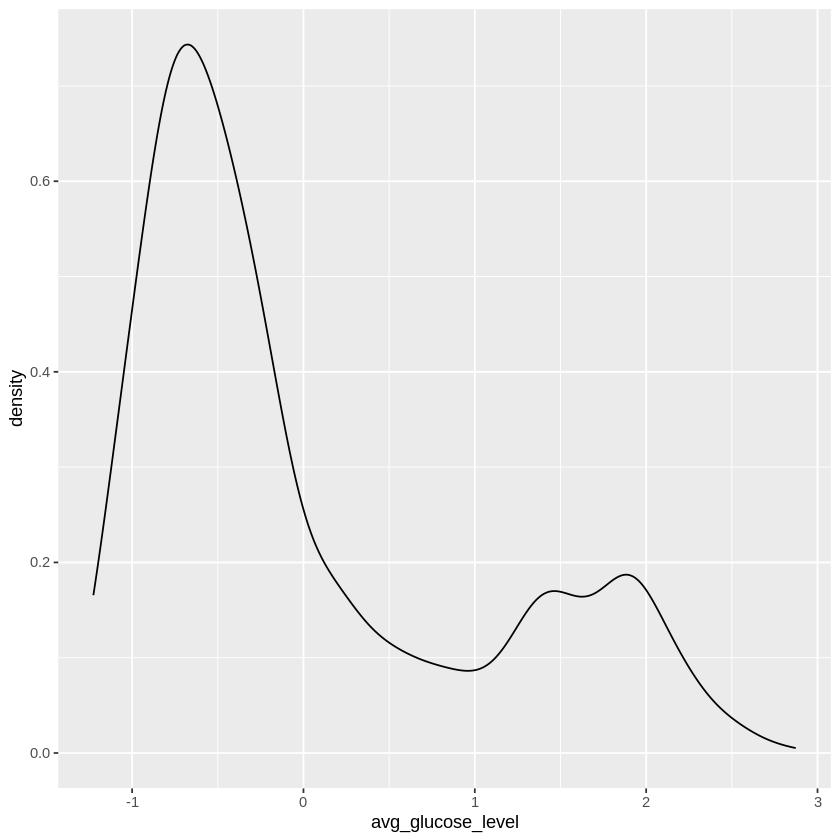

In [ ]:
ggplot(stroke_oversampled, aes(x=avg_glucose_level)) +
  geom_density()

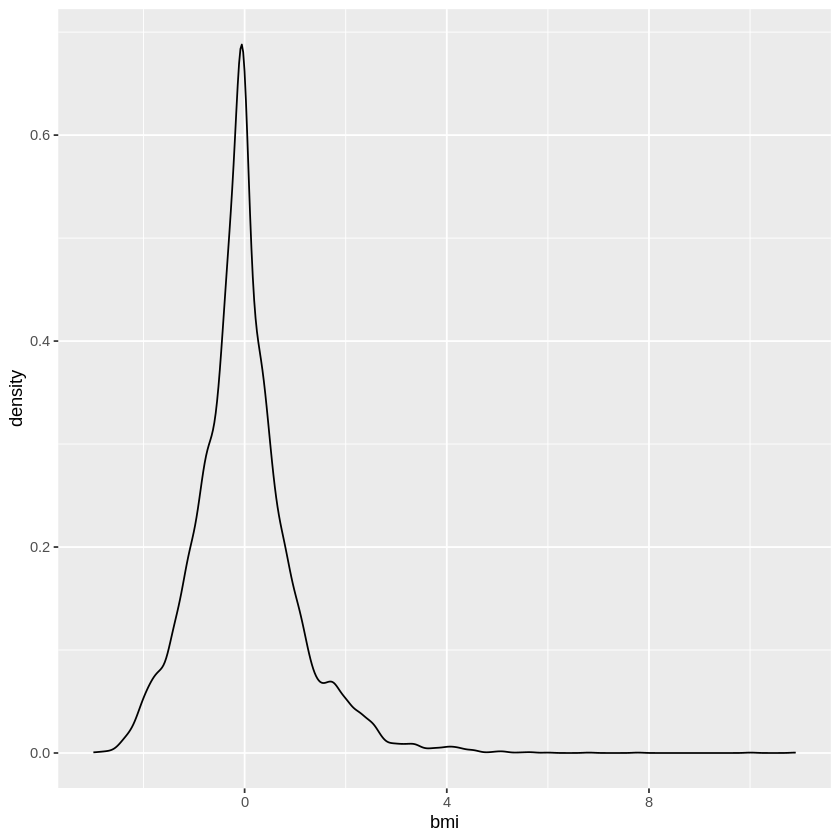

In [ ]:
ggplot(stroke_oversampled, aes(x=bmi)) +
  geom_density()

In [ ]:
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
set.seed(123)
stroke_oversampled$id <- 1:nrow(stroke_oversampled)
sample <- sample.split(stroke_oversampled$id, SplitRatio = 0.7)
train  <- subset(stroke_oversampled, sample == TRUE)
test   <- subset(stroke_oversampled, sample == FALSE)

In [ ]:
dim(train)

[1] 6804   15

In [ ]:
dim(test)

[1] 2916   15

Logistic regresion

In [ ]:
lr_spec <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

In [ ]:
colnames(train)

[1] "age"                  "hypertension"         "heart_disease"       
 [4] "ever_married"         "avg_glucose_level"    "bmi"                 
 [7] "stroke"               "gender_female"        "work_type_private"   
[10] "work_type_self"       "work_type_govt"       "residence_type_rural"
[13] "smoking_formerly"     "smoking_smokes"       "id"

In [ ]:
str(train)

'data.frame':	6694 obs. of  15 variables:
 $ age                 : num [1:6694, 1] 0.479 1.062 1.106 0.793 0.121 ...
 $ hypertension        : int  0 0 0 1 0 0 0 0 0 0 ...
 $ heart_disease       : int  1 1 0 1 0 0 1 0 1 1 ...
 $ ever_married        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ avg_glucose_level   : num [1:6694, 1] 2.121 -0.239 1.304 -0.928 -0.811 ...
 $ bmi                 : num [1:6694, 1] 1.3468 0.6331 0.0239 -0.2546 0.0053 ...
 $ stroke              : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ gender_female       : int  0 0 0 0 1 1 1 1 0 1 ...
 $ work_type_private   : int  1 1 1 1 1 1 0 1 1 1 ...
 $ work_type_self      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ work_type_govt      : int  0 0 0 0 0 0 1 0 0 0 ...
 $ residence_type_rural: int  0 1 0 1 1 0 1 0 0 0 ...
 $ smoking_formerly    : int  1 0 1 0 0 0 0 0 0 0 ...
 $ smoking_smokes      : int  0 0 0 0 0 1 1 1 0 0 ...
 $ id                  : int  1 3 6 7 9 10 12 13 14 15 ...


In [ ]:
lr_fit <- lr_spec %>%
  fit(stroke ~ age + heart_disease + ever_married + avg_glucose_level + work_type_private + work_type_self + work_type_govt + hypertension + bmi, data = train)
lr_fit

parsnip model object


Call:  stats::glm(formula = stroke ~ age + heart_disease + ever_married + 
    avg_glucose_level + work_type_private + work_type_self + 
    work_type_govt + hypertension + bmi, family = stats::binomial, 
    data = data)

Coefficients:
      (Intercept)                age      heart_disease       ever_married  
          3.57076            2.86812           -0.99713           -0.61678  
avg_glucose_level  work_type_private     work_type_self     work_type_govt  
          0.46573           -3.88430           -4.69446           -5.06909  
     hypertension                bmi  
         -0.79535            0.06772  

Degrees of Freedom: 6803 Total (i.e. Null);  6794 Residual
Null Deviance:	    9432 
Residual Deviance: 3842 	AIC: 3862

In [ ]:
lr_fit <- lr_spec %>%
  fit(stroke ~ age + heart_disease + ever_married + work_type_self + hypertension + bmi, data = train)
lr_fit

parsnip model object


Call:  stats::glm(formula = stroke ~ age + heart_disease + ever_married + 
    work_type_self + hypertension + bmi, family = stats::binomial, 
    data = data)

Coefficients:
   (Intercept)             age   heart_disease    ever_married  work_type_self  
       0.65980         2.94925        -0.94650        -0.95601        -1.57821  
  hypertension             bmi  
      -0.83805         0.06014  

Degrees of Freedom: 6803 Total (i.e. Null);  6797 Residual
Null Deviance:	    9432 
Residual Deviance: 5098 	AIC: 5112

In [ ]:
lr_fit %>%
  pluck("fit") %>%
  summary()


Call:
stats::glm(formula = stroke ~ age + heart_disease + ever_married + 
    avg_glucose_level + work_type_private + work_type_self + 
    work_type_govt + hypertension + bmi, family = stats::binomial, 
    data = data)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)        3.57076    0.17814  20.044  < 2e-16 ***
age                2.86812    0.07527  38.106  < 2e-16 ***
heart_disease     -0.99713    0.15015  -6.641 3.12e-11 ***
ever_married      -0.61678    0.12150  -5.076 3.85e-07 ***
avg_glucose_level  0.46573    0.04211  11.060  < 2e-16 ***
work_type_private -3.88430    0.18768 -20.697  < 2e-16 ***
work_type_self    -4.69446    0.21070 -22.280  < 2e-16 ***
work_type_govt    -5.06909    0.23139 -21.907  < 2e-16 ***
hypertension      -0.79535    0.12397  -6.416 1.40e-10 ***
bmi                0.06772    0.04693   1.443    0.149    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family take

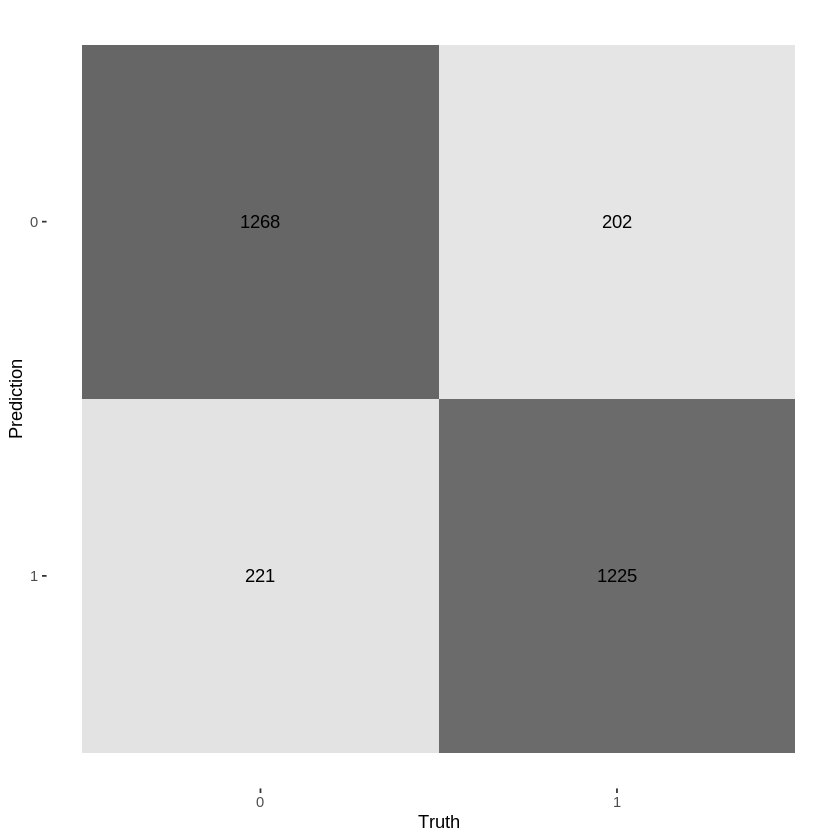

In [ ]:
augment(lr_fit, new_data = test) %>%
  conf_mat(truth = stroke, estimate = .pred_class) %>%
  autoplot(type = "heatmap")

In [ ]:
augment(lr_fit, new_data = test) %>%
  accuracy(truth = stroke, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8549383


In [ ]:
pred_lr <- predict(lr_fit, new_data = test, type = "prob")

In [ ]:
pred.sm <- prediction(pred_lr$.pred_1, test$stroke)

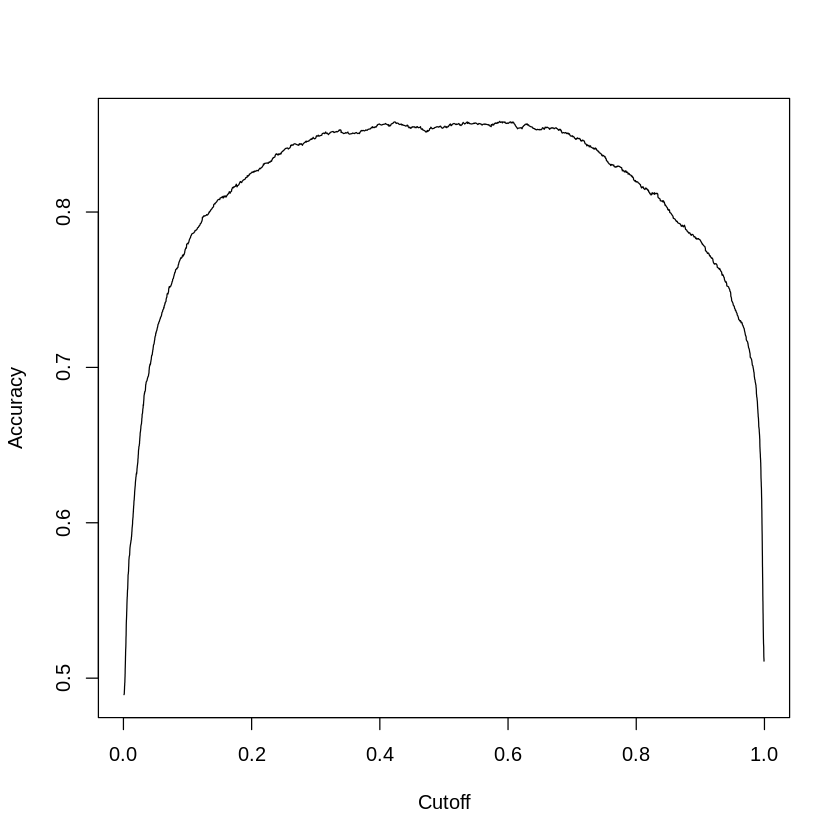

In [ ]:
acc_treshold <- performance(pred.sm, measure = "acc")
plot(acc_treshold)

In [ ]:
max <- which.max(slot(acc_treshold, "y.values")[[1]]) # номер максимальної ординати об'єкту `acc.sm2005`
acc.max <- slot(acc_treshold, "y.values")[[1]][max]
acc.max

[1] 0.8583676

In [ ]:
cutoff.acc.max <- slot(acc_treshold, "x.values")[[1]][max]
cutoff.acc.max

[1] 0.5871052

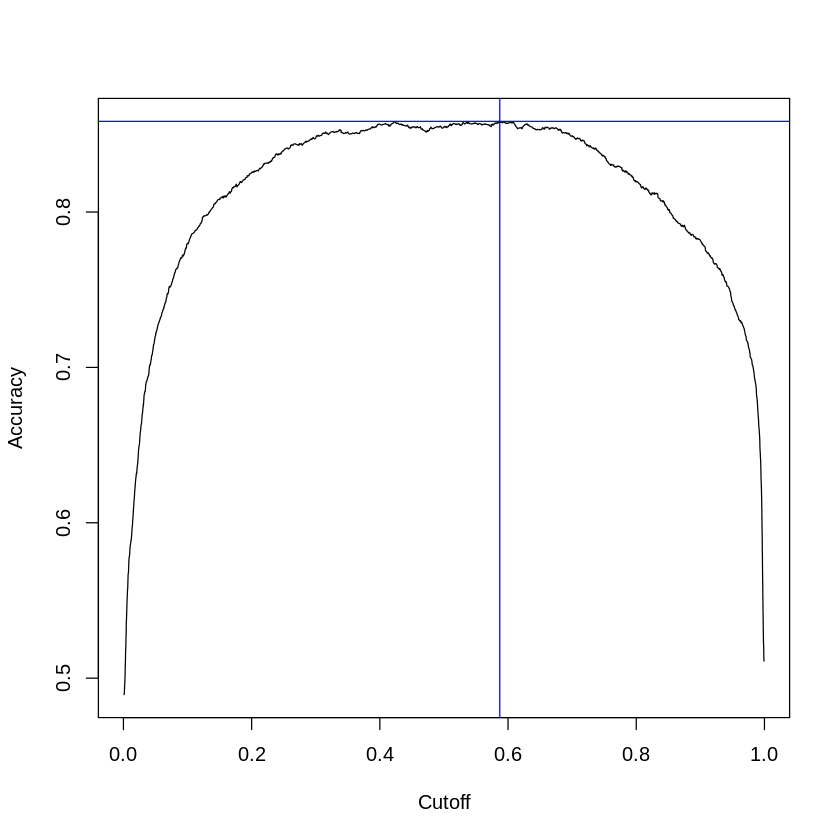

In [ ]:
acc_treshold <- performance(pred.sm, measure = "acc")
plot(acc_treshold)
abline(h=acc.max, v=cutoff.acc.max, col="blue")

In [ ]:
print(c(Accuracy = acc.max, Cutoff = cutoff.acc.max))

 Accuracy    Cutoff 
0.8583676 0.5871052 


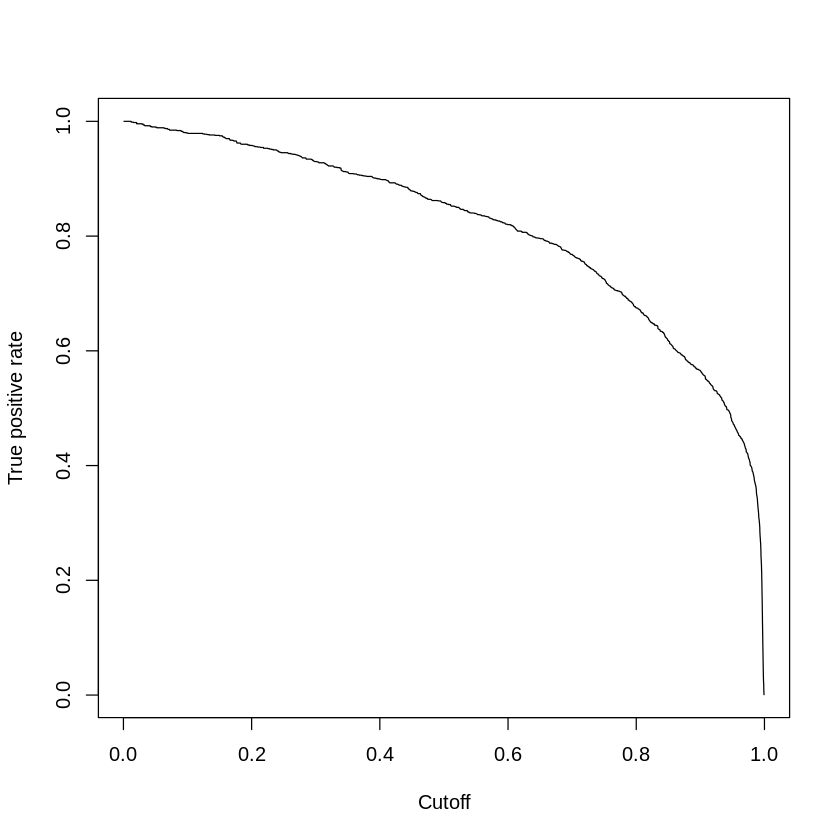

In [ ]:
plot(performance(pred.sm, measure = "tpr"))

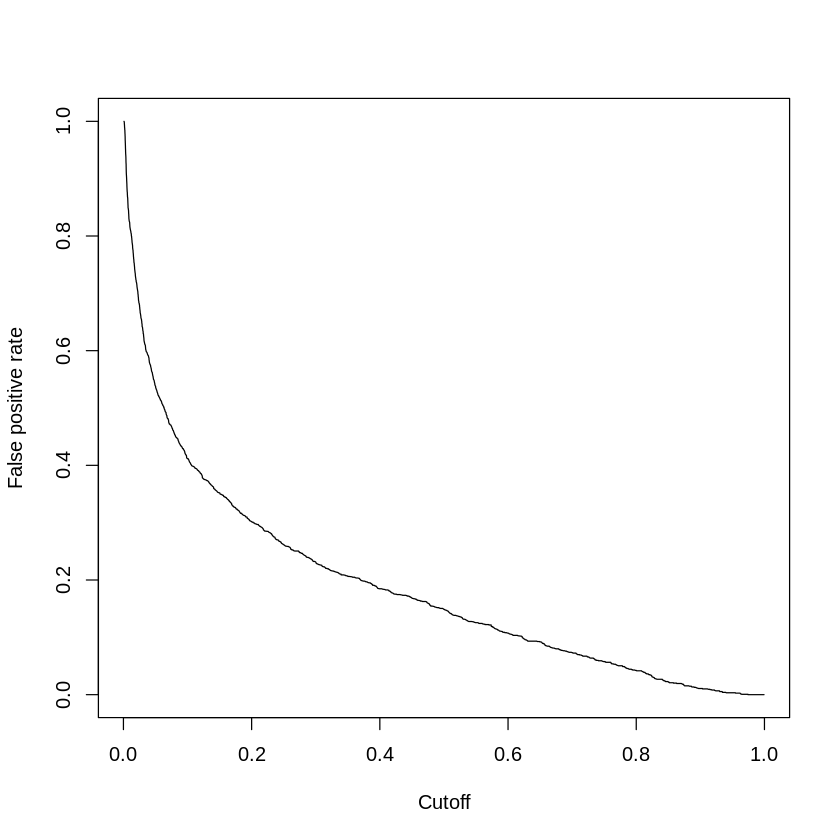

In [ ]:
plot(performance(pred.sm, measure = "fpr"))

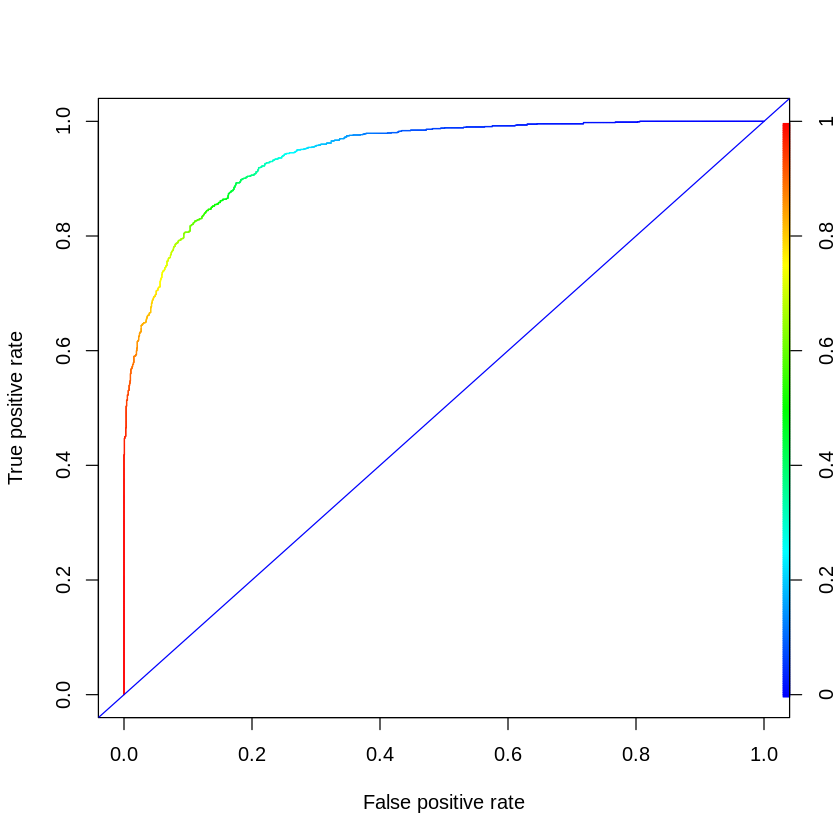

In [ ]:
roc.sm <- performance(pred.sm, "tpr", "fpr")
plot(roc.sm, colorize = T)
abline(a=0, b=1, col="blue")

In [ ]:
auc.sm <- performance(pred.sm, "auc")
auc.sm <-unlist(slot(auc.sm, "y.values"))
auc.sm

[1] 0.942414

Setting levels: control = 0, case = 1

Setting direction: controls < cases



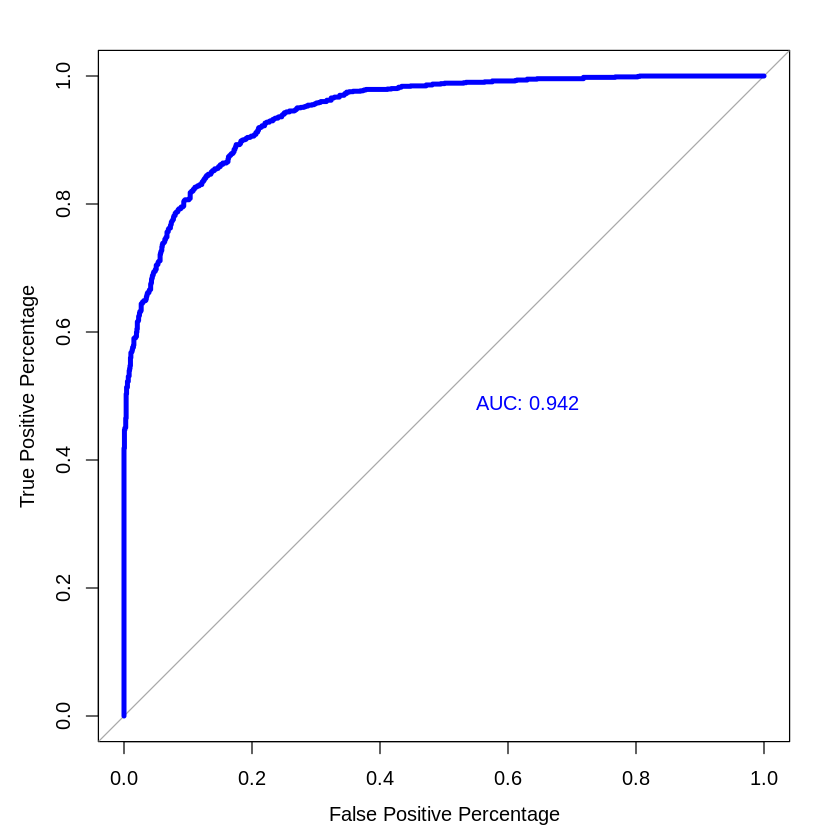

In [ ]:
my_roc <- roc(test$stroke, pred_lr$.pred_1, plot=TRUE, legacy.axes=TRUE, xlab="False Positive Percentage", ylab="True Positive Percentage", col="blue", lwd=4, print.auc=TRUE, print.auc.x=0.45)

In [ ]:
coord_best_treshold <- coords(my_roc, "best", ret = "threshold")
coord_best_treshold

threshold
<dbl>
0.4223997


In [ ]:
coord_best_tpr <- coords(my_roc, "best", ret = "tpr")
coord_best_tpr

,tpr
,<dbl>
threshold,0.8927821


In [ ]:
coord_best_fpr <- coords(my_roc, "best", ret = "fpr")
coord_best_fpr

,fpr
,<dbl>
threshold,0.1752854


In [ ]:
coord_best_fnr <- coords(my_roc, "best", ret = "fnr")
coord_best_fnr

,fnr
,<dbl>
threshold,0.1072179


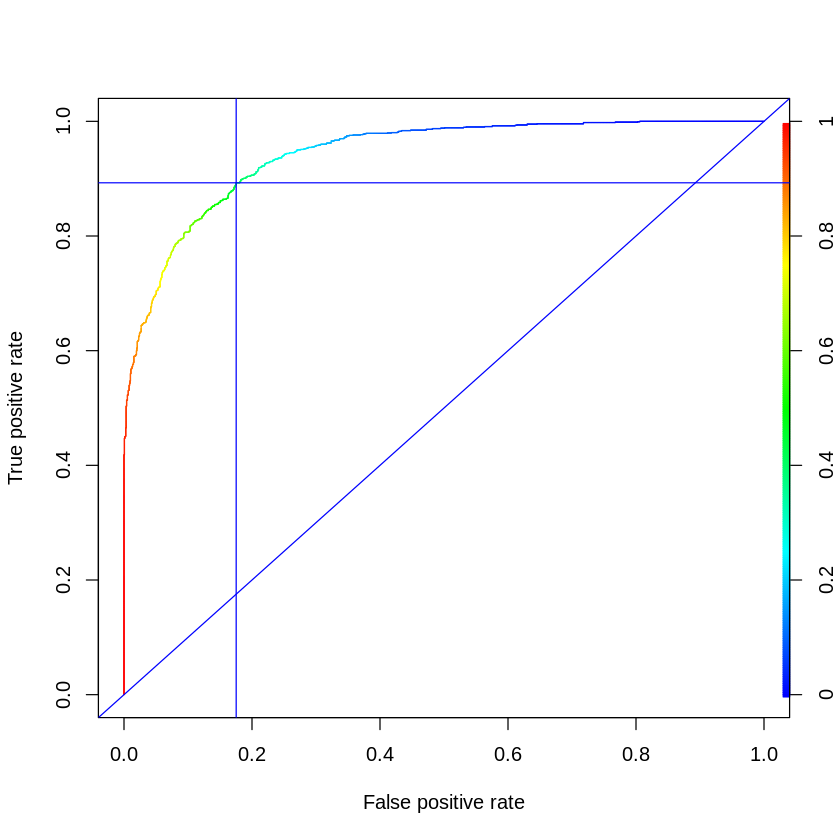

In [ ]:
roc.sm <- performance(pred.sm, "tpr", "fpr")
plot(roc.sm, colorize = T)
abline(a=0, b=1, col="blue")
abline(h=coord_best_tpr, v = coord_best_fpr, col="blue")

LDA

In [ ]:
lda_spec <- discrim_linear() %>%
  set_mode("classification") %>%
  set_engine("MASS")

In [ ]:
lda_fit <- lda_spec %>%
  fit(stroke ~ age + heart_disease + ever_married + work_type_self + hypertension + bmi, data = train)
lda_fit

parsnip model object

Call:
lda(stroke ~ age + heart_disease + ever_married + work_type_self + 
    hypertension + bmi, data = data)

Prior probabilities of groups:
        0         1 
0.4954439 0.5045561 

Group means:
         age heart_disease ever_married work_type_self hypertension         bmi
0 -0.6434893    0.04716701    0.6460991      0.1566301   0.08958766 -0.05512163
1  0.6521241    0.06029712    0.7876493      0.1074862   0.09292164  0.03564089

Coefficients of linear discriminants:
                       LD1
age             1.56153084
heart_disease  -0.54454575
ever_married   -0.72180125
work_type_self -0.91302487
hypertension   -0.50957664
bmi            -0.09814668

In [ ]:
lda_fit = lda_spec %>%
  fit(stroke ~ age + heart_disease + ever_married + avg_glucose_level + work_type_private + work_type_self + work_type_govt + hypertension + bmi, data = train)
lda_fit

parsnip model object

Call:
lda(stroke ~ age + heart_disease + ever_married + avg_glucose_level + 
    work_type_private + work_type_self + work_type_govt + hypertension + 
    bmi, data = data)

Prior probabilities of groups:
        0         1 
0.4954439 0.5045561 

Group means:
         age heart_disease ever_married avg_glucose_level work_type_private
0 -0.6434893    0.04716701    0.6460991        -0.2783863         0.5704539
1  0.6521241    0.06029712    0.7876493         0.2817522         0.3515875
  work_type_self work_type_govt hypertension         bmi
0      0.1566301     0.12785524   0.08958766 -0.05512163
1      0.1074862     0.02650743   0.09292164  0.03564089

Coefficients of linear discriminants:
                          LD1
age                1.39299442
heart_disease     -0.51822804
ever_married      -0.43227293
avg_glucose_level  0.26078613
work_type_private -1.34063480
work_type_self    -1.76021747
work_type_govt    -2.06017508
hypertension      -0.43529719
bmi      

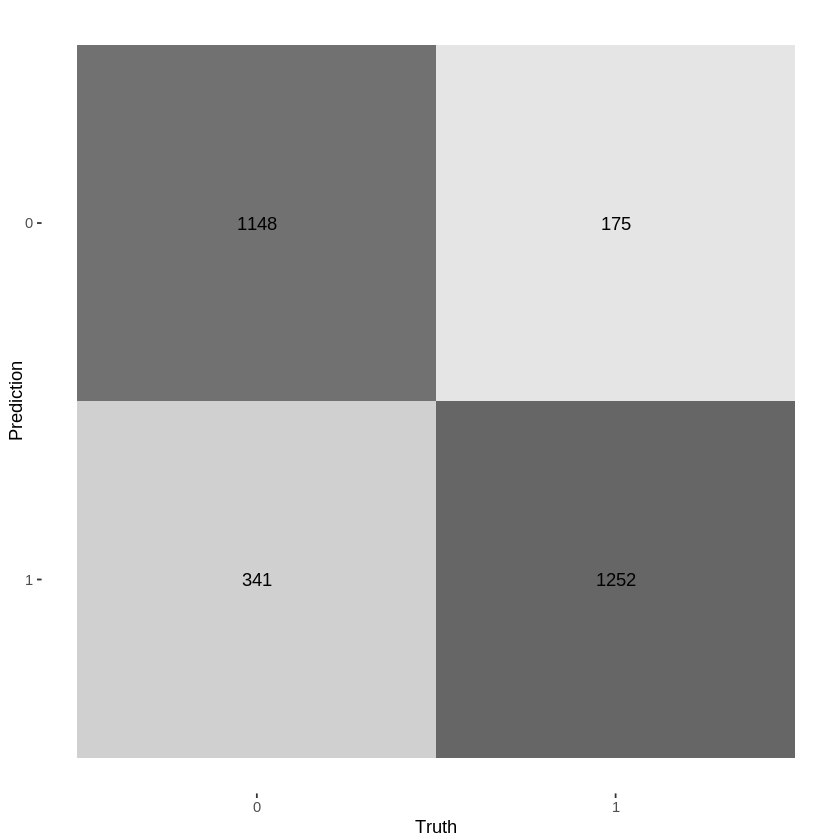

In [ ]:
augment(lda_fit, new_data = test) %>%
  conf_mat(truth = stroke, estimate = .pred_class) %>%
  autoplot(type = "heatmap")

In [ ]:
augment(lda_fit, new_data = test) %>%
      accuracy(truth = stroke, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8230453


In [ ]:
pred_lda <- predict(lda_fit, new_data = test, type = "prob")

In [ ]:
pred.sm <- prediction(pred_lda$.pred_1, test$stroke)

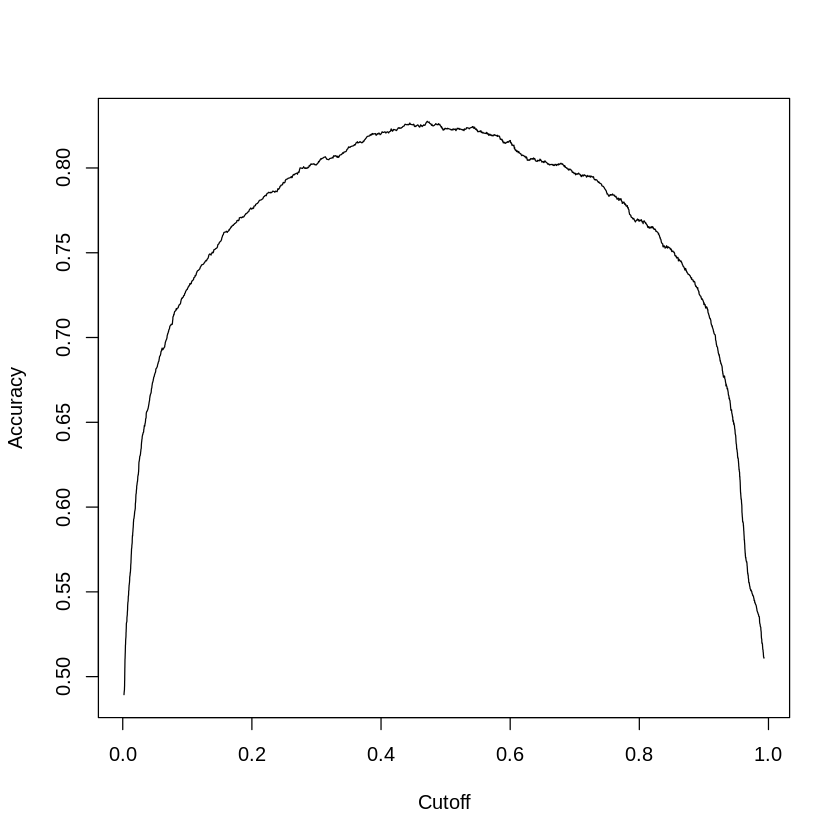

In [ ]:
acc_treshold <- performance(pred.sm, measure = "acc")
plot(acc_treshold)

In [ ]:
max <- which.max(slot(acc_treshold, "y.values")[[1]]) # номер максимальної ординати об'єкту `acc.sm2005`
acc.max <- slot(acc_treshold, "y.values")[[1]][max]
acc.max

[1] 0.8275034

In [ ]:
cutoff.acc.max <- slot(acc_treshold, "x.values")[[1]][max]
cutoff.acc.max

[1] 0.4717692

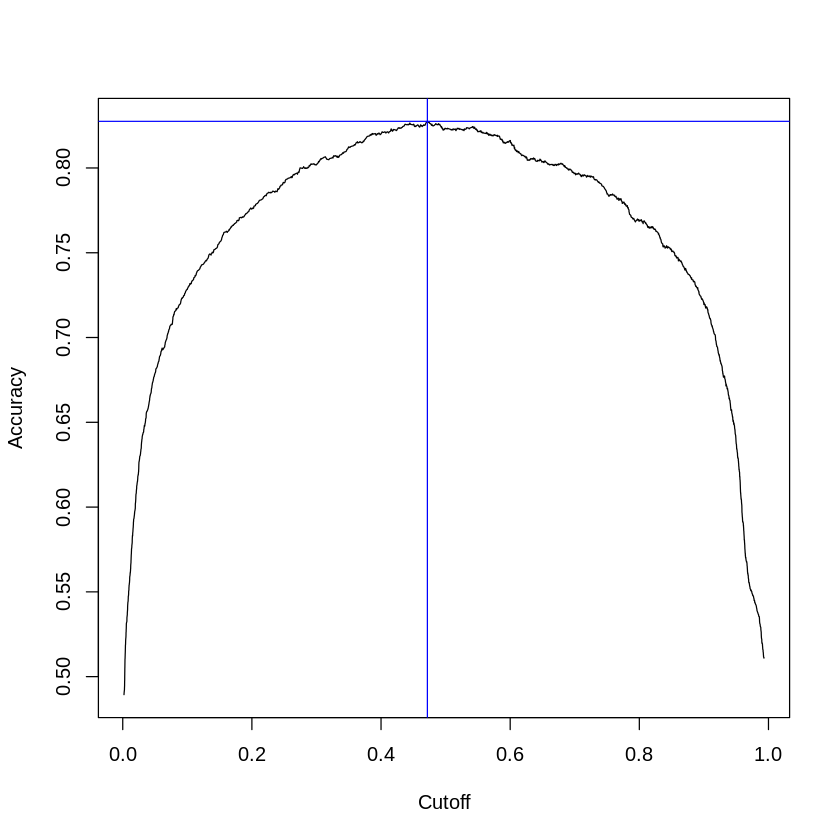

In [ ]:
acc_treshold <- performance(pred.sm, measure = "acc")
plot(acc_treshold)
abline(h=acc.max, v=cutoff.acc.max, col="blue")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



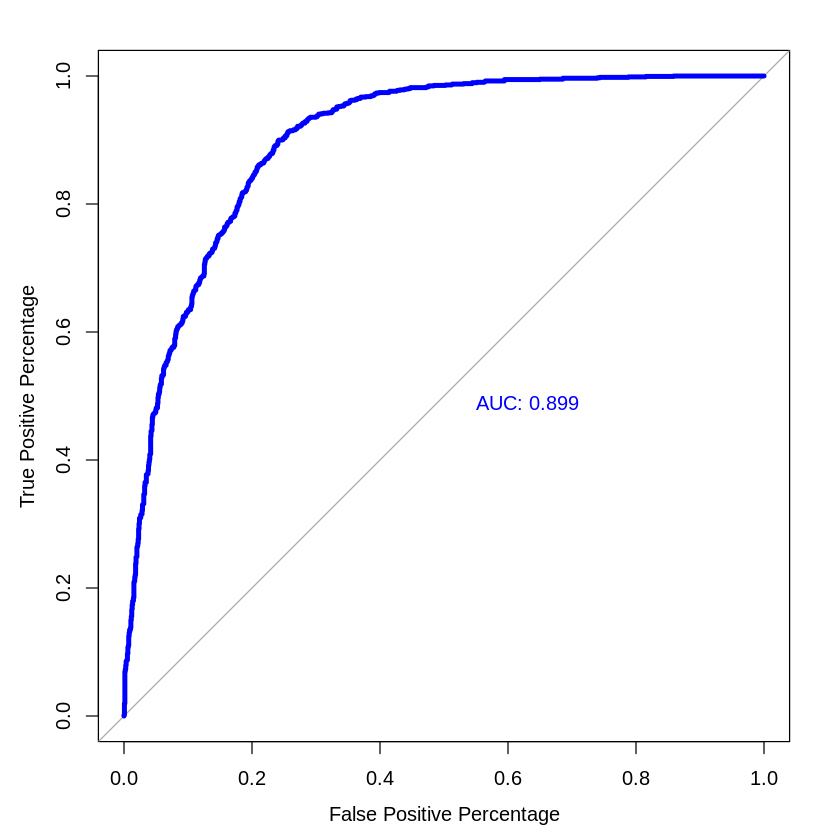

In [ ]:
my_roc <- roc(test$stroke, pred_lda$.pred_1, plot=TRUE, legacy.axes=TRUE, xlab="False Positive Percentage", ylab="True Positive Percentage", col="blue", lwd=4, print.auc=TRUE, print.auc.x=0.45)

In [ ]:
coord_best_tpr <- coords(my_roc, "best", ret = "tpr")
coord_best_tpr

,tpr
,<dbl>
threshold,0.8997898


In [ ]:
coord_best_fpr <- coords(my_roc, "best", ret = "fpr")
coord_best_fpr

,fpr
,<dbl>
threshold,0.241773


In [ ]:
coord_best_treshold <- coords(my_roc, "best", ret = "threshold")
coord_best_treshold

threshold
<dbl>
0.4711722


In [ ]:
coord_best_treshold <- coords(my_roc, "best", ret = "fnr")
coord_best_treshold

,fnr
,<dbl>
threshold,0.1002102


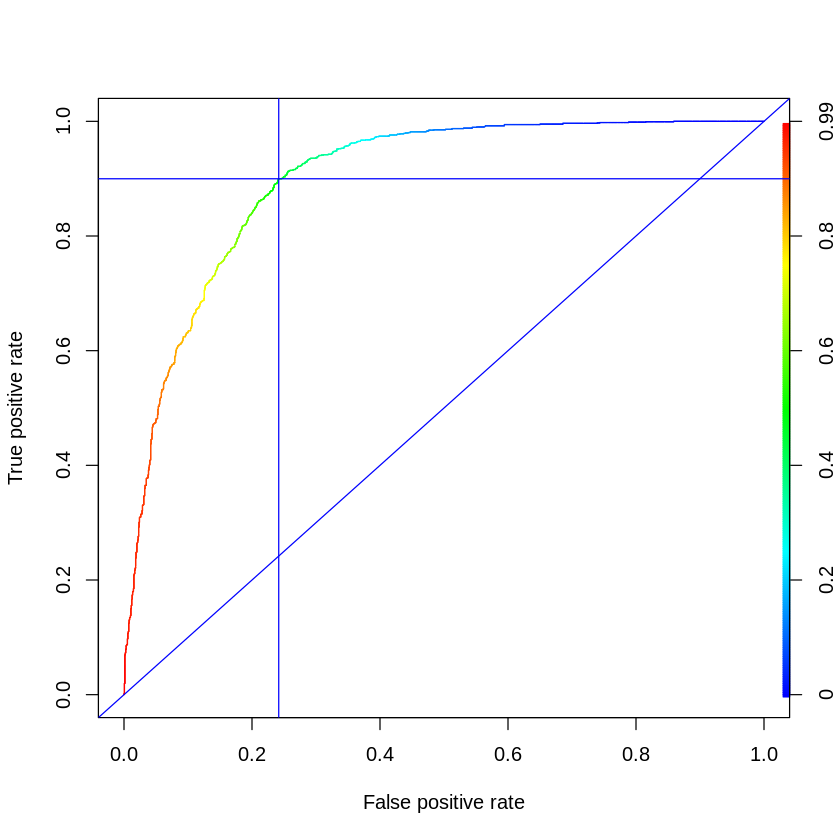

In [ ]:
roc.sm <- performance(pred.sm, "tpr", "fpr")
plot(roc.sm, colorize = T)
abline(a=0, b=1, col="blue")
abline(h=coord_best_tpr, v = coord_best_fpr, col="blue")

In [ ]:
install.packages("rpart")
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘rpart’


The following object is masked from ‘package:dials’:

    prune




In [ ]:
classifier = rpart(stroke ~  age + hypertension + heart_disease + ever_married + work_type + bmi, data = train)

In [ ]:
augment(classifier, new_data = test) %>%
  conf_mat(truth = stroke, estimate = .pred_class) %>%
  autoplot(type = "heatmap")

ERROR: Error: No augment method for objects of class rpart


In [ ]:
pred_lr <- predict(lr_fit, new_data = test, type = "prob")

In [ ]:
head(data_disease)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_female,work_type_private,work_type_self,work_type_govt,residence_type_rural,smoking_formerly,smoking_smokes
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,67,0,1,1,228.69,36.60000,1,0,1,0,0,0,1,0
2,61,0,0,1,202.21,28.89324,1,1,0,1,0,1,0,0
3,80,0,1,1,105.92,32.50000,1,0,1,0,0,1,0,0
4,49,0,0,1,171.23,34.40000,1,1,1,0,0,0,0,1
5,79,1,0,1,174.12,24.00000,1,1,0,1,0,1,0,0
6,81,0,0,1,186.21,29.00000,1,0,1,0,0,0,1,0


In [ ]:
str(data_disease)

'data.frame':	5030 obs. of  14 variables:
 $ age                 : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension        : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease       : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married        : int  1 1 1 1 1 1 1 0 1 1 ...
 $ avg_glucose_level   : num  229 202 106 171 174 ...
 $ bmi                 : num  36.6 28.9 32.5 34.4 24 ...
 $ stroke              : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ gender_female       : int  0 1 0 1 1 0 0 1 1 1 ...
 $ work_type_private   : int  1 0 1 1 0 1 1 1 1 1 ...
 $ work_type_self      : int  0 1 0 0 1 0 0 0 0 0 ...
 $ work_type_govt      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ residence_type_rural: int  0 1 1 0 1 0 1 0 1 0 ...
 $ smoking_formerly    : int  1 0 0 0 0 1 0 0 0 0 ...
 $ smoking_smokes      : int  0 0 0 1 0 0 0 0 0 1 ...


*Decision* Tree

In [ ]:
install.packages("vip")
library(vip)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
tidymodels_prefer()

In [ ]:
C5.0

In [ ]:
dec_tree_spec <- decision_tree() %>%
  set_mode("classification") %>%
  set_engine("C5.0")
dec_tree_spec

Decision Tree Model Specification (classification)

Computational engine: C5.0 


In [ ]:
dec_tree_spec

Decision Tree Model Specification (classification)

Main Arguments:
  cost_complexity = tune()
  tree_depth = tune()

Computational engine: rpart 


In [ ]:
install.packages("dials")
library(dials)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
dec_tree_fit <- dec_tree_spec %>% fit(stroke ~ age + ever_married + hypertension + bmi + work_type_self + heart_disease, data = train)

In [ ]:
dec_tree_fit <- dec_tree_spec %>% fit(stroke ~ age + heart_disease + ever_married + avg_glucose_level + work_type_private + work_type_self + work_type_govt + bmi, data = train)

In [ ]:
dec_tree_fit

parsnip model object


Call:
C5.0.default(x = x, y = y, trials = 1, control = C50::C5.0Control(minCases =
 2, sample = 0))

Classification Tree
Number of samples: 6804 
Number of predictors: 8 

Tree size: 72 

Non-standard options: attempt to group attributes


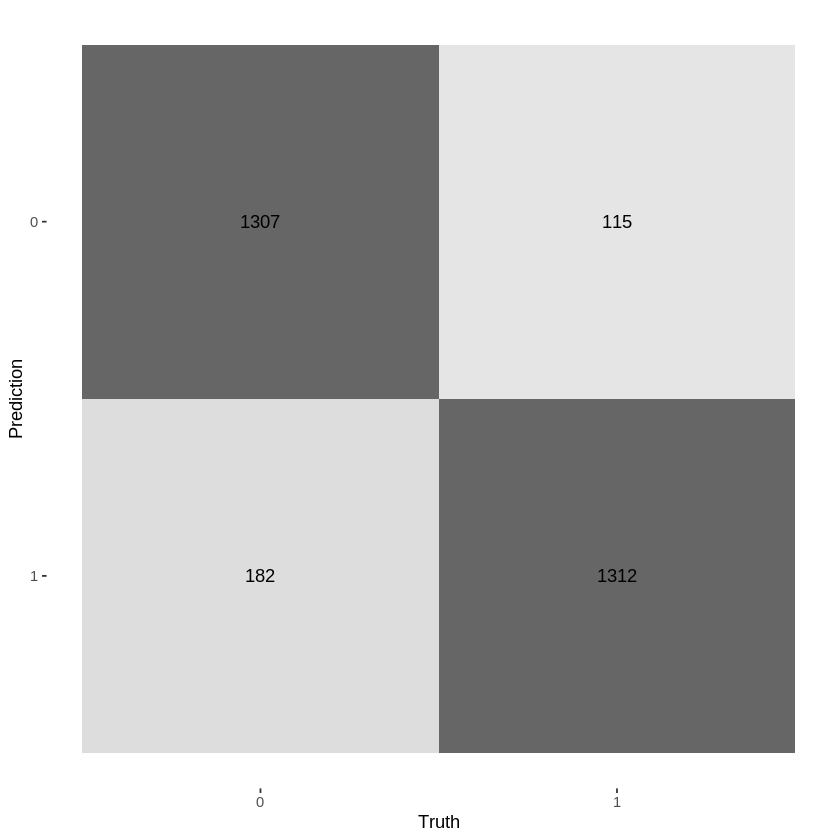

In [ ]:
augment(dec_tree_fit, new_data = test) %>%
  conf_mat(truth = stroke, estimate = .pred_class) %>%
  autoplot(type = "heatmap")

In [ ]:
augment(dec_tree_fit, new_data = test) %>%
  accuracy(truth = stroke, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8981481


In [ ]:
pred_tree <- predict(dec_tree_fit, new_data = test, type = "prob")

In [ ]:
pred.sm <- prediction(pred_tree$.pred_1, test$stroke)

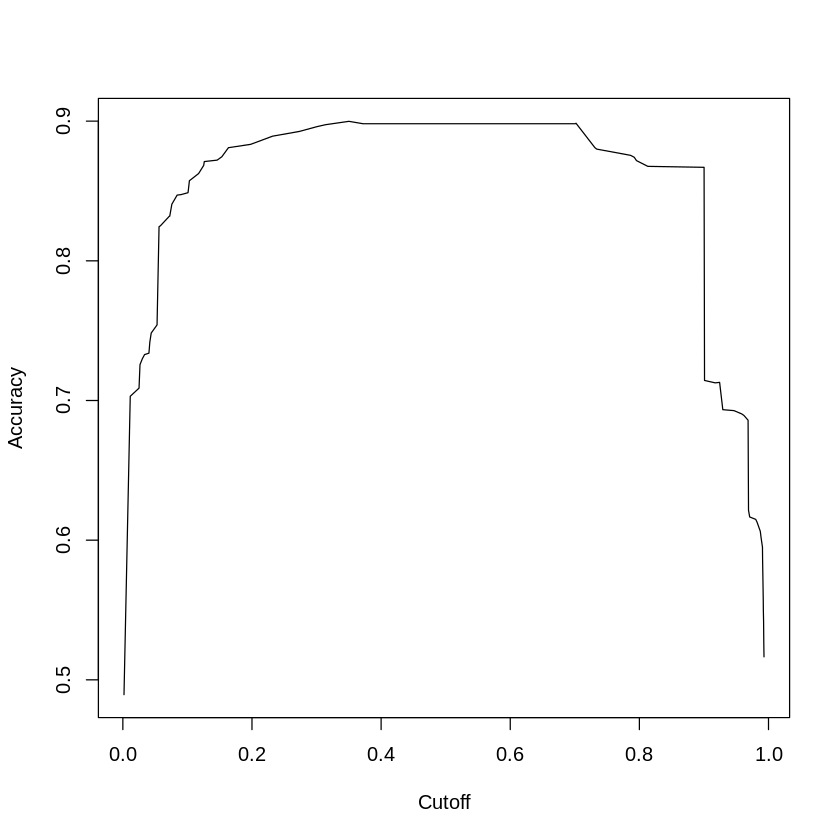

In [ ]:
acc_treshold <- performance(pred.sm, measure = "acc")
plot(acc_treshold)

In [ ]:
max <- which.max(slot(acc_treshold, "y.values")[[1]]) # номер максимальної ординати об'єкту `acc.sm2005`
acc.max <- slot(acc_treshold, "y.values")[[1]][max]
acc.max

[1] 0.8998628

In [ ]:
cutoff.acc.max <- slot(acc_treshold, "x.values")[[1]][max]
cutoff.acc.max

[1] 0.3501519

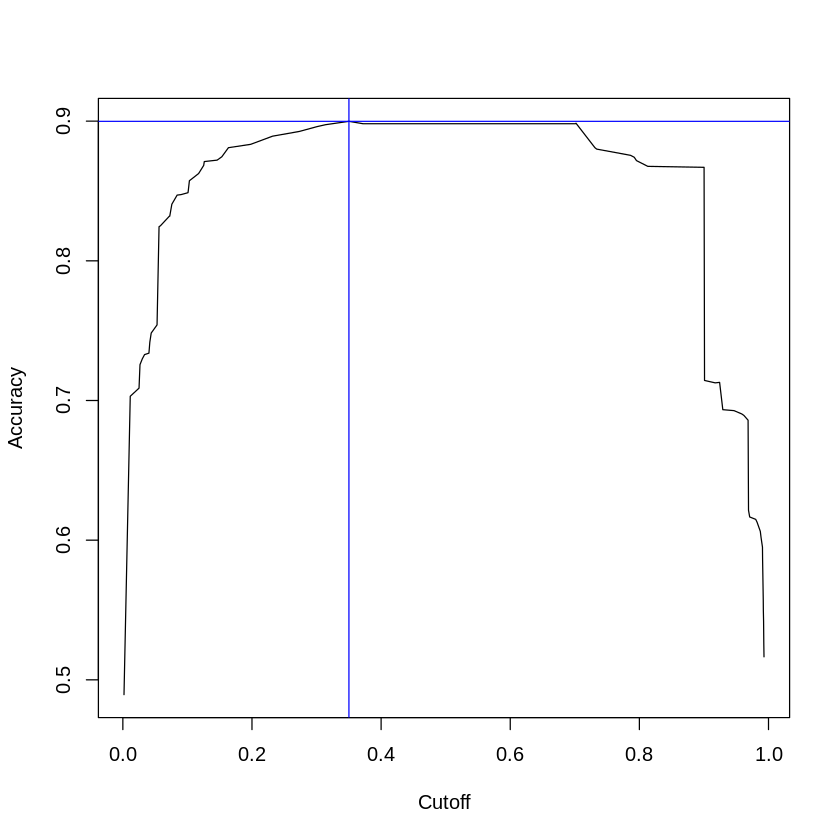

In [ ]:
acc_treshold <- performance(pred.sm, measure = "acc")
plot(acc_treshold)
abline(h=acc.max, v=cutoff.acc.max, col="blue")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



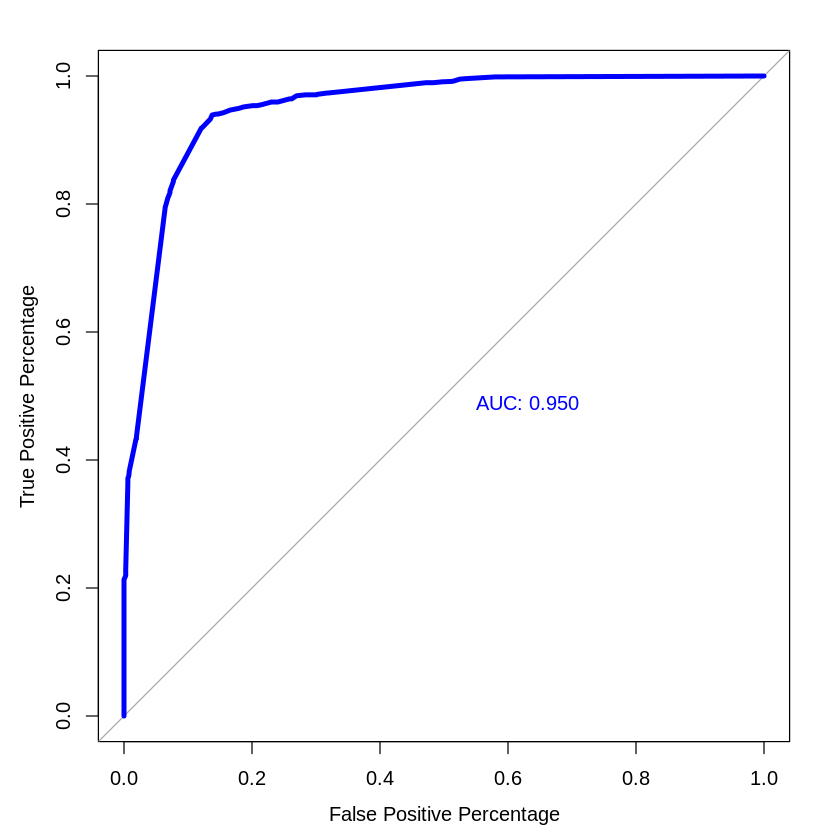

In [ ]:
my_roc <- roc(test$stroke, pred_tree$.pred_1, plot=TRUE, legacy.axes=TRUE, xlab="False Positive Percentage", ylab="True Positive Percentage", col="blue", lwd=4, print.auc=TRUE, print.auc.x=0.45)

In [ ]:
coord_best_tpr <- coords(my_roc, "best", ret = "tpr")
coord_best_tpr

,tpr
,<dbl>
threshold,0.9390329


In [ ]:
coord_best_fpr <- coords(my_roc, "best", ret = "fpr")
coord_best_fpr

,fpr
,<dbl>
threshold,0.1376763


In [ ]:
coord_best_fnr <- coords(my_roc, "best", ret = "fnr")
coord_best_fnr

,fnr
,<dbl>
threshold,0.06096706


In [ ]:
coord_best_treshold <- coords(my_roc, "best", ret = "threshold")
coord_best_treshold

threshold
<dbl>
0.3321057


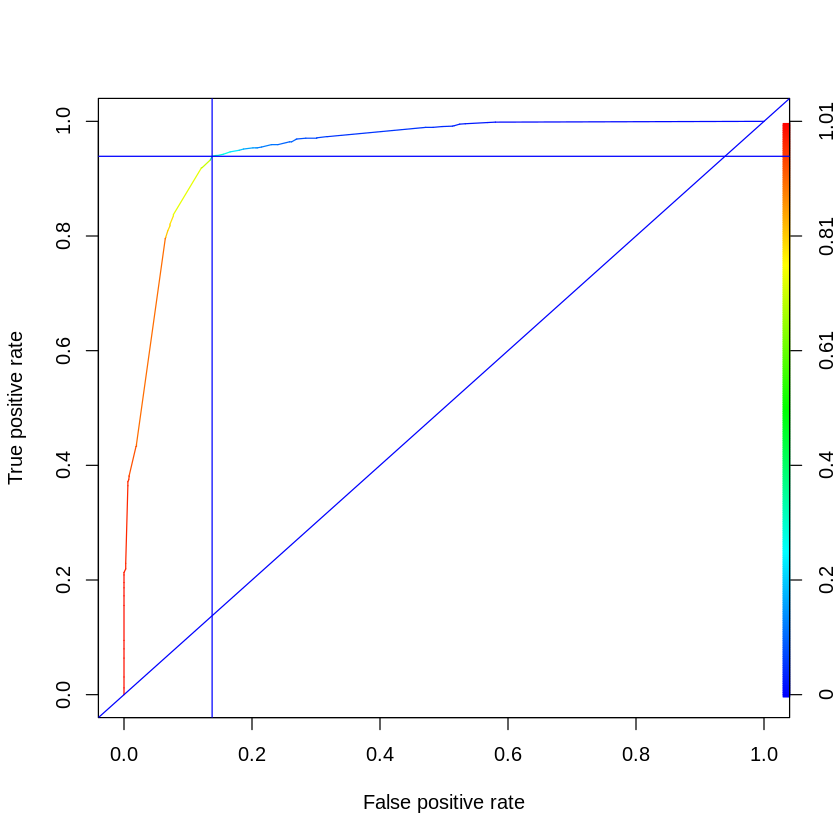

In [ ]:
roc.sm <- performance(pred.sm, "tpr", "fpr")
plot(roc.sm, colorize = T)
abline(a=0, b=1, col="blue")
abline(h=coord_best_tpr, v = coord_best_fpr, col="blue")

In [ ]:
install.packages("C50")
library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Random Forest

In [ ]:
install.packages("ranger")
library(ranger)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [ ]:
set.seed(123)
rand_forest_spec <- rand_forest() %>%
  set_mode("classification") %>%
  set_engine("ranger")
rand_forest_spec

Random Forest Model Specification (classification)

Computational engine: ranger 


In [ ]:
set.seed(123)
rand_forest_spec <- rand_forest() %>%
  set_mode("classification")
rand_forest_spec

Random Forest Model Specification (classification)

Computational engine: ranger 


In [ ]:
set.seed(123)
rand_forest_fit <- rand_forest_spec %>% fit(stroke ~ age + heart_disease + ever_married + avg_glucose_level + work_type_private + work_type_self + work_type_govt + bmi, data = train)

In [ ]:
set.seed(123)
rand_forest_fit <- rand_forest_spec %>% fit(stroke ~ age + ever_married + hypertension + bmi + work_type_self + heart_disease, data = train)

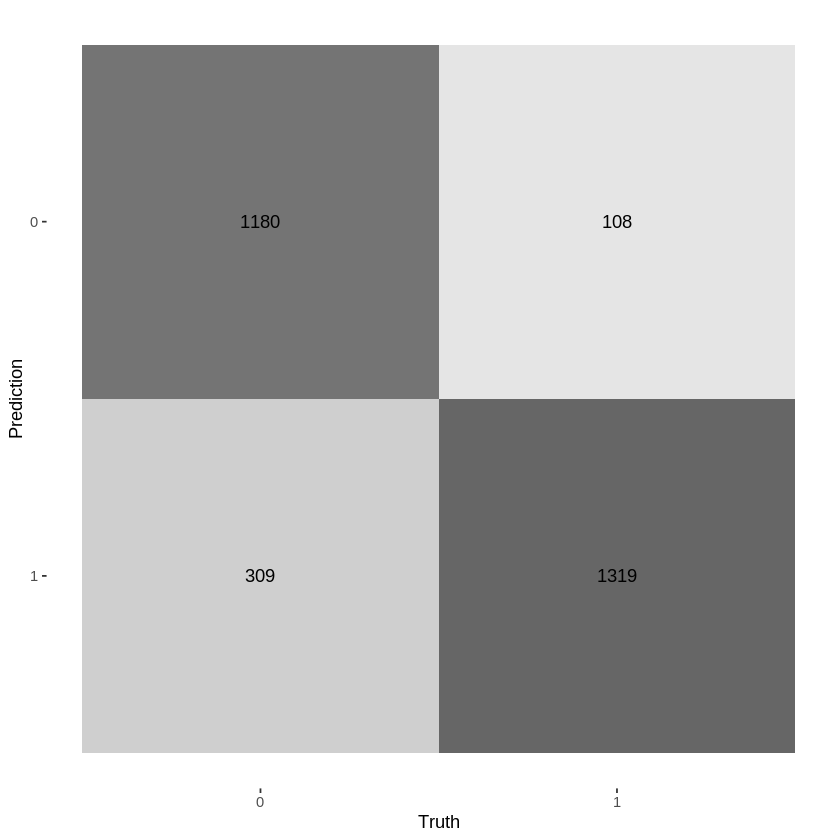

In [ ]:
augment(rand_forest_fit, new_data = test) %>%
  conf_mat(truth = stroke, estimate = .pred_class) %>%
  autoplot(type = "heatmap")

In [ ]:
augment(rand_forest_fit, new_data = test) %>%
  accuracy(truth = stroke, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8569959


In [ ]:
pred_rand_forest <- predict(rand_forest_fit, new_data = test, type = "prob")

In [ ]:
pred.sm <- prediction(pred_rand_forest$.pred_1, test$stroke)

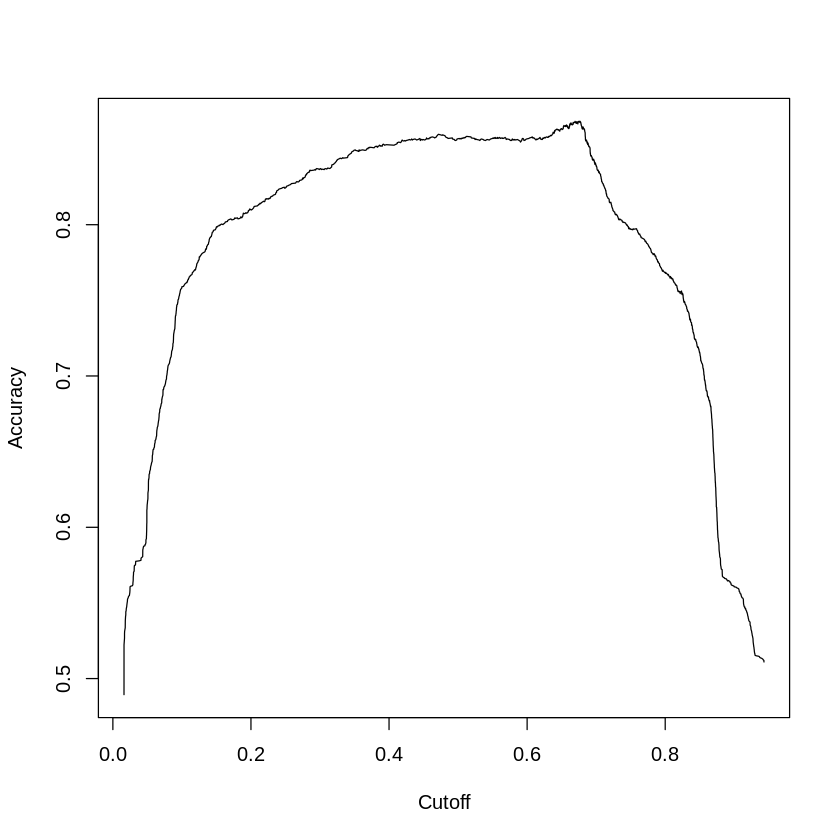

In [ ]:
acc_treshold <- performance(pred.sm, measure = "acc")
plot(acc_treshold)

In [ ]:
max <- which.max(slot(acc_treshold, "y.values")[[1]]) # номер максимальної ординати об'єкту `acc.sm2005`
acc.max <- slot(acc_treshold, "y.values")[[1]][max]
acc.max

[1] 0.8683128

In [ ]:
cutoff.acc.max <- slot(acc_treshold, "x.values")[[1]][max]
cutoff.acc.max

[1] 0.676731

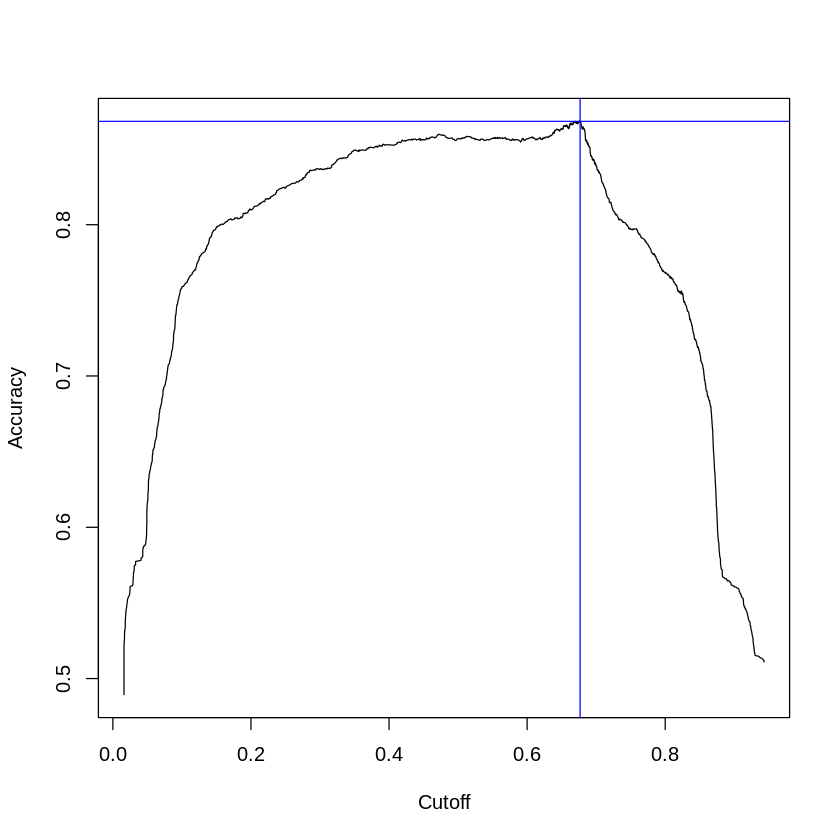

In [ ]:
acc_treshold <- performance(pred.sm, measure = "acc")
plot(acc_treshold)
abline(h=acc.max, v=cutoff.acc.max, col="blue")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



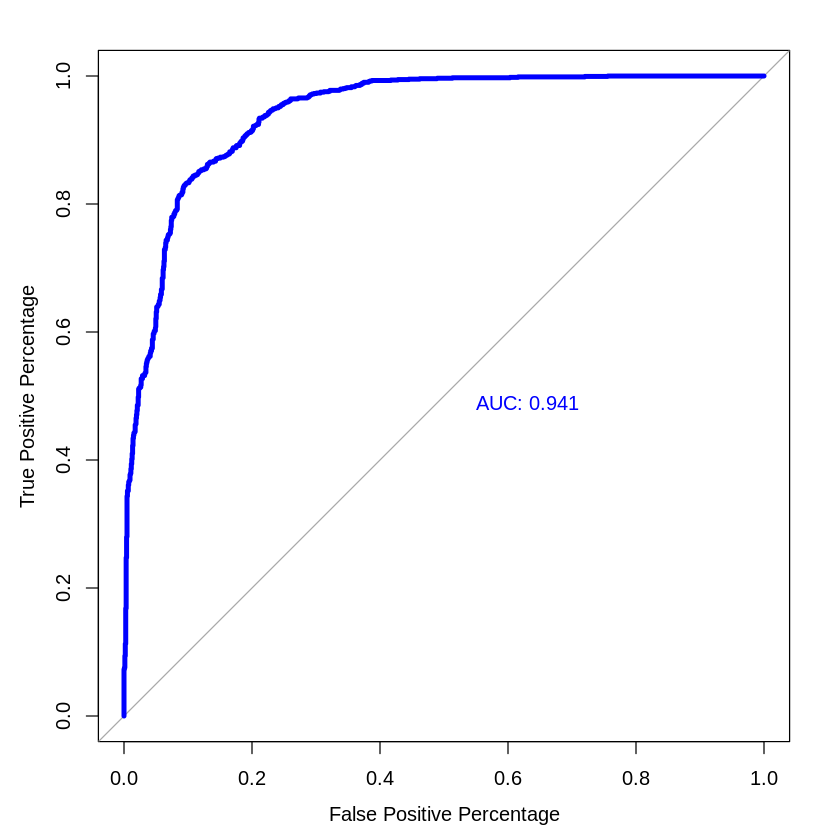

In [ ]:
my_roc <- roc(test$stroke, pred_rand_forest$.pred_1, plot=TRUE, legacy.axes=TRUE, xlab="False Positive Percentage", ylab="True Positive Percentage", col="blue", lwd=4, print.auc=TRUE, print.auc.x=0.45)

In [ ]:
coord_best_tpr <- coords(my_roc, "best", ret = "tpr")
coord_best_tpr

,tpr
,<dbl>
threshold,0.8437281


In [ ]:
coord_best_fpr <- coords(my_roc, "best", ret = "fpr")
coord_best_fpr

,fpr
,<dbl>
threshold,0.1081263


In [ ]:
coord_best_fnr <- coords(my_roc, "best", ret = "fnr")
coord_best_fnr

,fnr
,<dbl>
threshold,0.1562719


In [ ]:
coord_best_treshold <- coords(my_roc, "best", ret = "threshold")
coord_best_treshold

threshold
<dbl>
0.669352


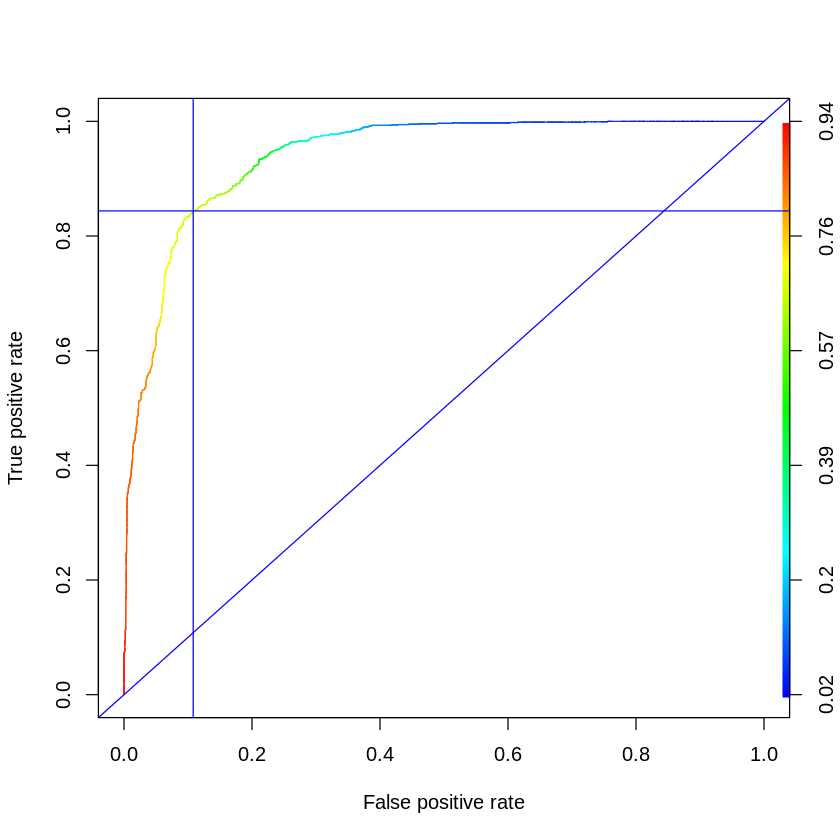

In [ ]:
roc.sm <- performance(pred.sm, "tpr", "fpr")
plot(roc.sm, colorize = T)
abline(a=0, b=1, col="blue")
abline(h=coord_best_tpr, v = coord_best_fpr, col="blue")

KNN

In [ ]:
install.packages("kknn")
library(kknn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
knn_spec <- nearest_neighbor() %>%
  set_mode("classification") %>%
  set_engine("kknn")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Computational engine: kknn 


In [ ]:
knn_fit <- knn_spec %>% fit(stroke ~ age + heart_disease + ever_married + avg_glucose_level + work_type_private + work_type_self + work_type_govt + bmi, data = train)

In [ ]:
knn_fit <- knn_spec %>% fit(stroke ~ age + heart_disease + ever_married + work_type_self + hypertension + bmi, data = train)

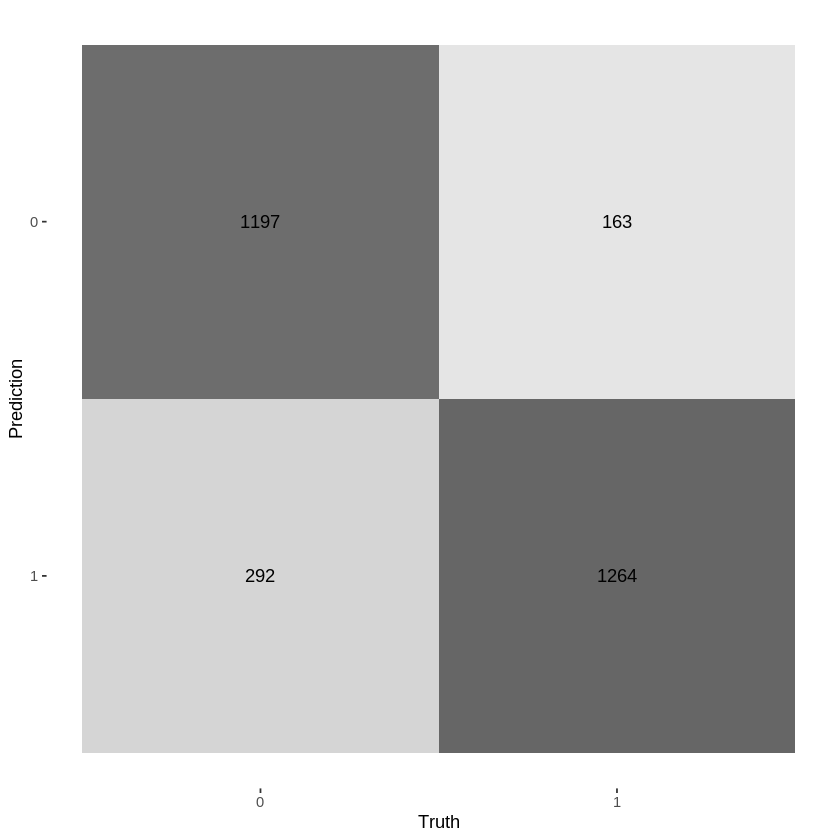

In [ ]:
augment(knn_fit, new_data = test) %>%
  conf_mat(truth = stroke, estimate = .pred_class) %>%
  autoplot(type = "heatmap")

In [ ]:
augment(knn_fit, new_data = test) %>%
  accuracy(truth = stroke, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8439643


In [ ]:
pred_knn <- predict(knn_fit, new_data = test, type = "prob")

In [ ]:
pred.sm <- prediction(pred_knn$.pred_1, test$stroke)

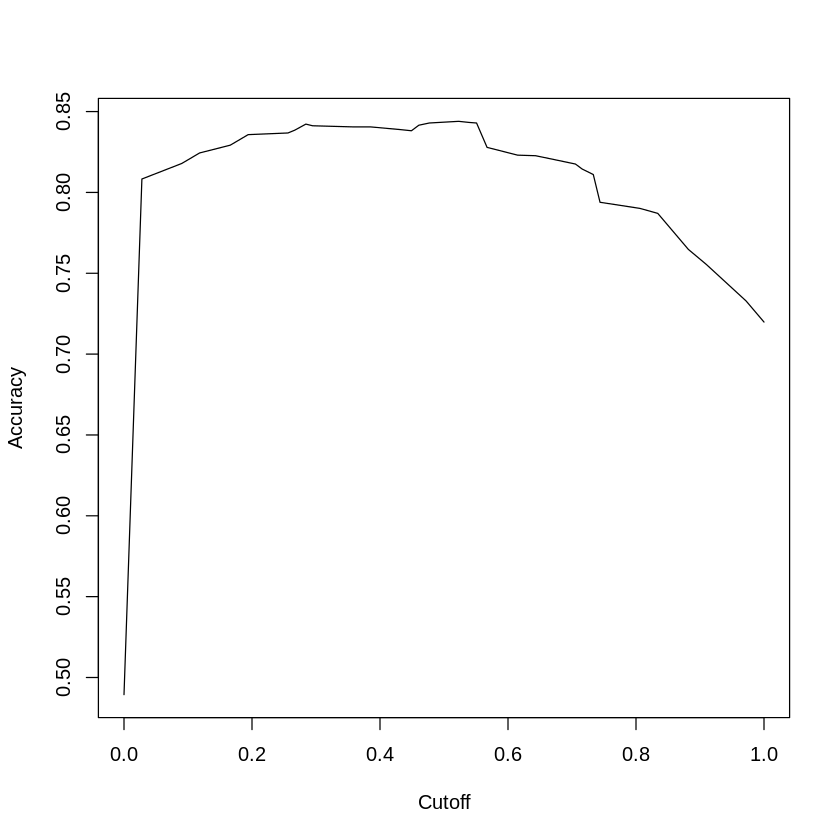

In [ ]:
acc_treshold <- performance(pred.sm, measure = "acc")
plot(acc_treshold)

In [ ]:
max <- which.max(slot(acc_treshold, "y.values")[[1]]) # номер максимальної ординати об'єкту `acc.sm2005`
acc.max <- slot(acc_treshold, "y.values")[[1]][max]
acc.max

[1] 0.8439643

In [ ]:
cutoff.acc.max <- slot(acc_treshold, "x.values")[[1]][max]
cutoff.acc.max

[1] 0.5229195

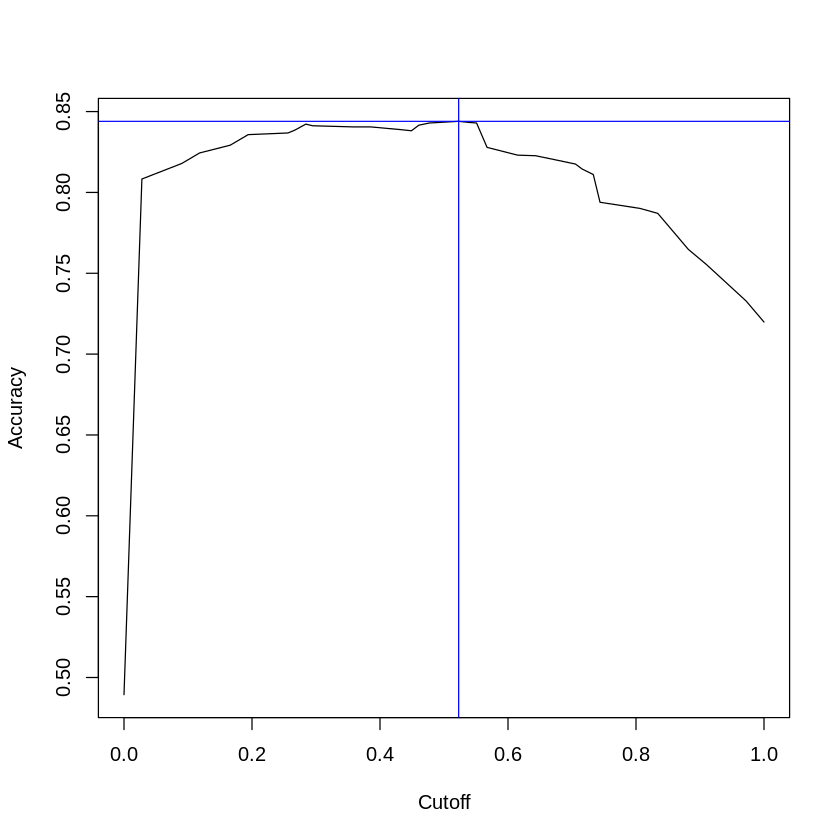

In [ ]:
acc_treshold <- performance(pred.sm, measure = "acc")
plot(acc_treshold)
abline(h=acc.max, v=cutoff.acc.max, col="blue")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



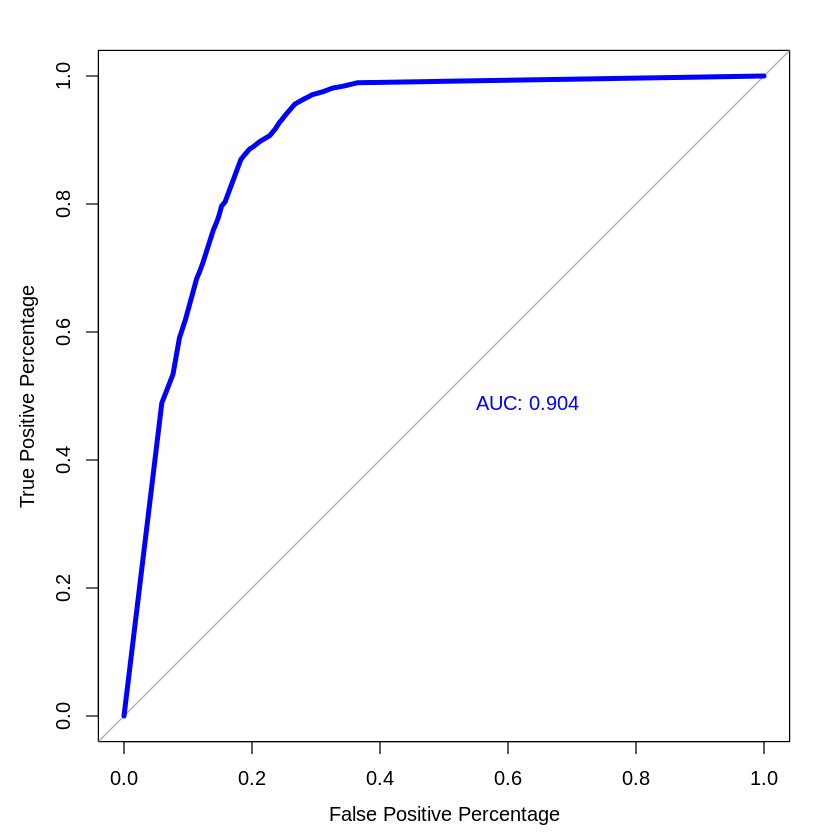

In [ ]:
my_roc <- roc(test$stroke, pred_knn$.pred_1, plot=TRUE, legacy.axes=TRUE, xlab="False Positive Percentage", ylab="True Positive Percentage", col="blue", lwd=4, print.auc=TRUE, print.auc.x=0.45)

In [ ]:
coord_best_tpr <- coords(my_roc, "best", ret = "tpr")
coord_best_tpr

,tpr
,<dbl>
threshold,0.8857744


In [ ]:
coord_best_fpr <- coords(my_roc, "best", ret = "fpr")
coord_best_fpr

,fpr
,<dbl>
threshold,0.1961048


In [ ]:
coord_best_fnr <- coords(my_roc, "best", ret = "fnr")
coord_best_fnr

,fnr
,<dbl>
threshold,0.1142256


In [ ]:
coord_best_treshold <- coords(my_roc, "best", ret = "threshold")
coord_best_treshold

threshold
<dbl>
0.5


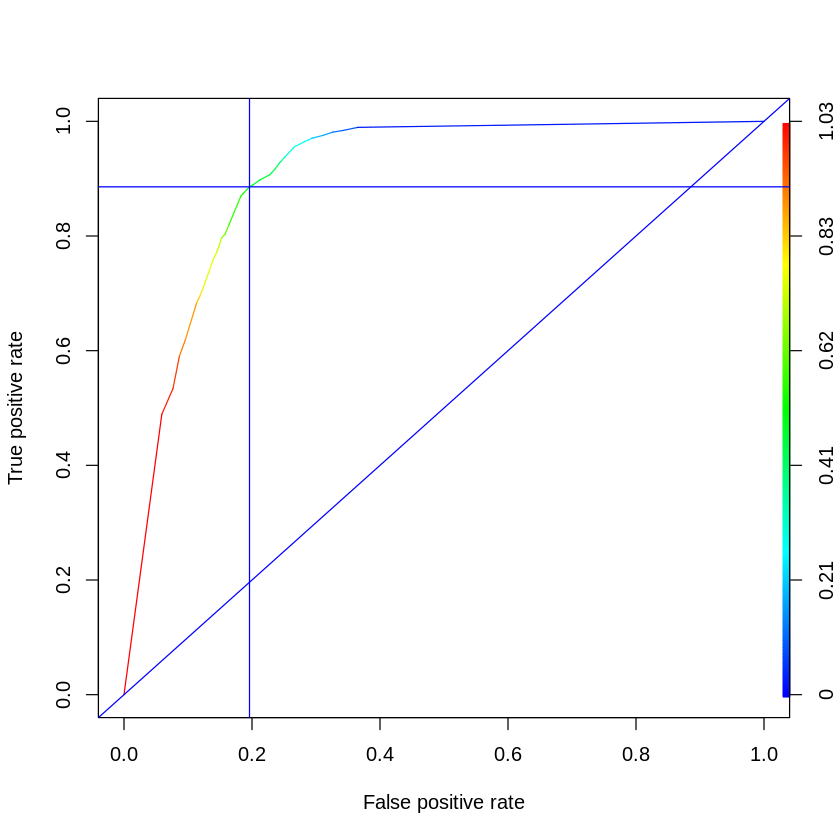

In [ ]:
roc.sm <- performance(pred.sm, "tpr", "fpr")
plot(roc.sm, colorize = T)
abline(a=0, b=1, col="blue")
abline(h=coord_best_tpr, v = coord_best_fpr, col="blue")